# Generate figures for report

This notebook was used to generate the figures in our final M2R report.

In [93]:
import pandas as pd
import numpy as np
from preprocessing import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.ticker import FuncFormatter
import scipy.optimize as op
plt.style.use("default") # Config plots for dark mode, delete if on light mode
plt.rcParams['figure.dpi'] = 150 # Hi-res plots

## Preprocessing the data

First, we read the data, starting with the model parameters:

In [94]:
M1_parameters = pd.read_csv("../data/parameters/M1_train_params.csv", index_col=0)
M2_parameters = pd.read_csv("../data/parameters/M2_train_params.csv", index_col=0)
M3_parameters = pd.read_csv("../data/parameters/M3_train_params.csv", index_col=0)
M4_parameters = pd.read_csv("../data/parameters/M4_train_params.csv", index_col=0)

We check they have been loaded properly:

In [95]:
M1_parameters.head()

lambda
1  0.084552
2  0.289622
3  0.081880
4  0.102126
5  0.306387

In [96]:
M2_parameters.head()

alpha      beta    lambda
1  0.014106  0.023018  0.005462
2  0.021212  0.023021  0.003802
3  0.019415  0.027979  0.004185
4  0.226693  0.942690  0.012930
5  0.022903  0.026077  0.006239

In [97]:
M3_parameters.head()

alpha      beta        lambda
1  0.020179  0.035553  7.705058e-03
2  0.015271  0.016036  1.213006e-03
3  0.004644  0.004644  3.779973e-17
4  0.009820  0.023543  9.676464e-03
5  0.011876  0.012869  1.258996e-03

In [98]:
M4_parameters.head()

lambda     alpha  alpha_prime      beta  beta_prime
1  0.004289  0.013056     0.017923  0.031378    0.051294
2  0.000957  0.185765     0.012679  1.004565    0.016323
3  0.000042  0.039154     0.003156  0.099732    0.005210
4  0.007390  0.229210     0.007624  1.002632    0.023494
5  0.001123  0.135349     0.009782  0.695608    0.013202

And now we read the p-values:

In [99]:
M1_p_values_test = pd.read_csv("../data/p_values/M1_p_values_test.csv", index_col=0)
M1_p_values_train = pd.read_csv("../data/p_values/M1_p_values_train.csv", index_col=0)
M2_p_values_test = pd.read_csv("../data/p_values/M2_p_values_test.csv", index_col=0)
M2_p_values_train = pd.read_csv("../data/p_values/M2_p_values_train.csv", index_col=0)
M3_p_values_test = pd.read_csv("../data/p_values/M3_p_values_test.csv", index_col=0)
M3_p_values_train = pd.read_csv("../data/p_values/M3_p_values_train.csv", index_col=0)
M4_p_values_test = pd.read_csv("../data/p_values/M4_p_values_test.csv", index_col=0)
M4_p_values_train = pd.read_csv("../data/p_values/M4_p_values_train.csv", index_col=0)

We define a helper function to convert the dataframes into dicts with keys being the station ID and the value being the p-value array:

In [100]:
def df_to_numpy_dict(dataframe):
    numpy_dict = {}
    for index in dataframe.index:
        nan_data = dataframe.loc[index].to_numpy()
        non_nan_data = nan_data[~np.isnan(nan_data)]
        numpy_dict[index] = non_nan_data
    return numpy_dict

Convert all the dataframes into dicts:

In [101]:
M1_p_value_dict_test = df_to_numpy_dict(M1_p_values_test)
M1_p_value_dict_train = df_to_numpy_dict(M1_p_values_train)
M2_p_value_dict_test = df_to_numpy_dict(M2_p_values_test)
M2_p_value_dict_train = df_to_numpy_dict(M2_p_values_train)
M3_p_value_dict_test = df_to_numpy_dict(M3_p_values_test)
M3_p_value_dict_train = df_to_numpy_dict(M3_p_values_train)
M4_p_value_dict_test = df_to_numpy_dict(M4_p_values_test)
M4_p_value_dict_train = df_to_numpy_dict(M4_p_values_train)

In [102]:
len(M4_p_value_dict_test[1])

535

And we compute the Kolomogorov-Smirnov test-statistic for each p-value for all the stations of a given model; we start by defining a helper function:

In [103]:
def kol_smir_dict(p_value_dict):
    kol_smir_test = {}
    for station_id, pvals in p_value_dict.items():
        kol_smir_test[station_id] = st.kstest(pvals, "uniform").statistic
    return kol_smir_test

And we now apply it to all of the dicts:

In [104]:
M1_ks_dict_test = kol_smir_dict(M1_p_value_dict_test)
M1_ks_dict_train = kol_smir_dict(M1_p_value_dict_train)
M2_ks_dict_test = kol_smir_dict(M2_p_value_dict_test)
M2_ks_dict_train = kol_smir_dict(M2_p_value_dict_train)
M3_ks_dict_test = kol_smir_dict(M3_p_value_dict_test)
M3_ks_dict_train = kol_smir_dict(M3_p_value_dict_train)
M4_ks_dict_test = kol_smir_dict(M4_p_value_dict_test)
M4_ks_dict_train = kol_smir_dict(M4_p_value_dict_train)

We make a helper function to join the p-values of all the stations for a given model:

In [105]:
def join_p_values(p_value_dict):
    return np.concatenate(np.array(list(p_value_dict.values()), dtype=object))

Apply it to all the stations:

In [106]:
M1_joined_p_values_dict_test = join_p_values(M1_p_value_dict_test)
M1_joined_p_values_dict_train = join_p_values(M1_p_value_dict_train)
M2_joined_p_values_dict_test = join_p_values(M2_p_value_dict_test)
M2_joined_p_values_dict_train = join_p_values(M2_p_value_dict_train)
M3_joined_p_values_dict_test = join_p_values(M3_p_value_dict_test)
M3_joined_p_values_dict_train = join_p_values(M3_p_value_dict_train)
M4_joined_p_values_dict_test = join_p_values(M4_p_value_dict_test)
M4_joined_p_values_dict_train = join_p_values(M4_p_value_dict_train)


Make a helper function to calculate the popularity of all individual stations for a given model:

In [107]:
def get_popularity_dict_test(p_value_dict):
    popularity_dict = {}
    for station_id in p_value_dict.keys():
        popularity_dict[station_id] = len(test_bike_data[test_bike_data.start_id == station_id])
    return popularity_dict
def get_popularity_dict_train(p_value_dict):
    popularity_dict = {}
    for station_id in p_value_dict.keys():
        popularity_dict[station_id] = len(train_bike_data[train_bike_data.start_id == station_id])
    return popularity_dict

Now apply it to all the models:

In [108]:
M1_popularity_dict_test = get_popularity_dict_test(M1_p_value_dict_test)
M1_popularity_dict_train = get_popularity_dict_train(M1_p_value_dict_train)
M2_popularity_dict_test = get_popularity_dict_test(M2_p_value_dict_test)
M2_popularity_dict_train = get_popularity_dict_train(M2_p_value_dict_train)
M3_popularity_dict_test = get_popularity_dict_test(M3_p_value_dict_test)
M3_popularity_dict_train = get_popularity_dict_train(M3_p_value_dict_train)
M4_popularity_dict_test = get_popularity_dict_test(M4_p_value_dict_test)
M4_popularity_dict_train = get_popularity_dict_train(M4_p_value_dict_train)

And now we have all we need to start making the figures

## Making the figures (Train)

### ECDF Plot

In [109]:
def plot_ecdf_M1():
    for station, pvals in M1_p_value_dict_train.items():
        x,y = ecdf(pvals)
        axs[0, 0].plot(x,y, alpha=0.1, linewidth=0.5, color="gray")
    axs[0, 0].arrow(0.4,0.1, -0.10,0.10,width=0.01)
    axs[0, 0].annotate( "Theoretical ECDF", xy =  (0.42,0.03), fontsize="x-small")
    axs[0, 0].annotate( " Observed ECDF\n(Arbitrary Station)", xy =  (0.6,0.23), fontsize="x-small")
    axs[0, 0].arrow(0.8,0.42, 0.0,0.13,width=0.01)
    axs[0, 0].plot([0,1], [0,1], color="black")
    axs[0, 0].set_title("Poisson")
    axs[0, 0].set_xlabel("P-value")
    axs[0, 0].set_ylabel("Empirical Frequency")
def plot_ecdf_M2():
    for station, pvals in M2_p_value_dict_train.items():
        x,y = ecdf(pvals)
        axs[0, 1].plot(x,y, alpha=0.1, linewidth=0.5, color="gray")
    axs[0, 1].plot([0,1], [0,1], color="black")
    axs[0, 1].set_title("Self-Exciting (Hawkes)")
def plot_ecdf_M3():
    for station, pvals in M3_p_value_dict_train.items():
        x,y = ecdf(pvals)
        axs[1, 0].plot(x,y, alpha=0.1, linewidth=0.5, color="gray")
    axs[1, 0].plot([0,1], [0,1], color="black")
    axs[1, 0].set_title("Mutually-Exciting")
def plot_ecdf_M4():
    for station, pvals in M4_p_value_dict_train.items():
        x,y = ecdf(pvals)
        axs[1, 1].plot(x,y, alpha=0.1, linewidth=0.5, color="gray")
    axs[1, 1].plot([0,1], [0,1], color="black")
    axs[1, 1].set_title("Self and Mutually Exciting")

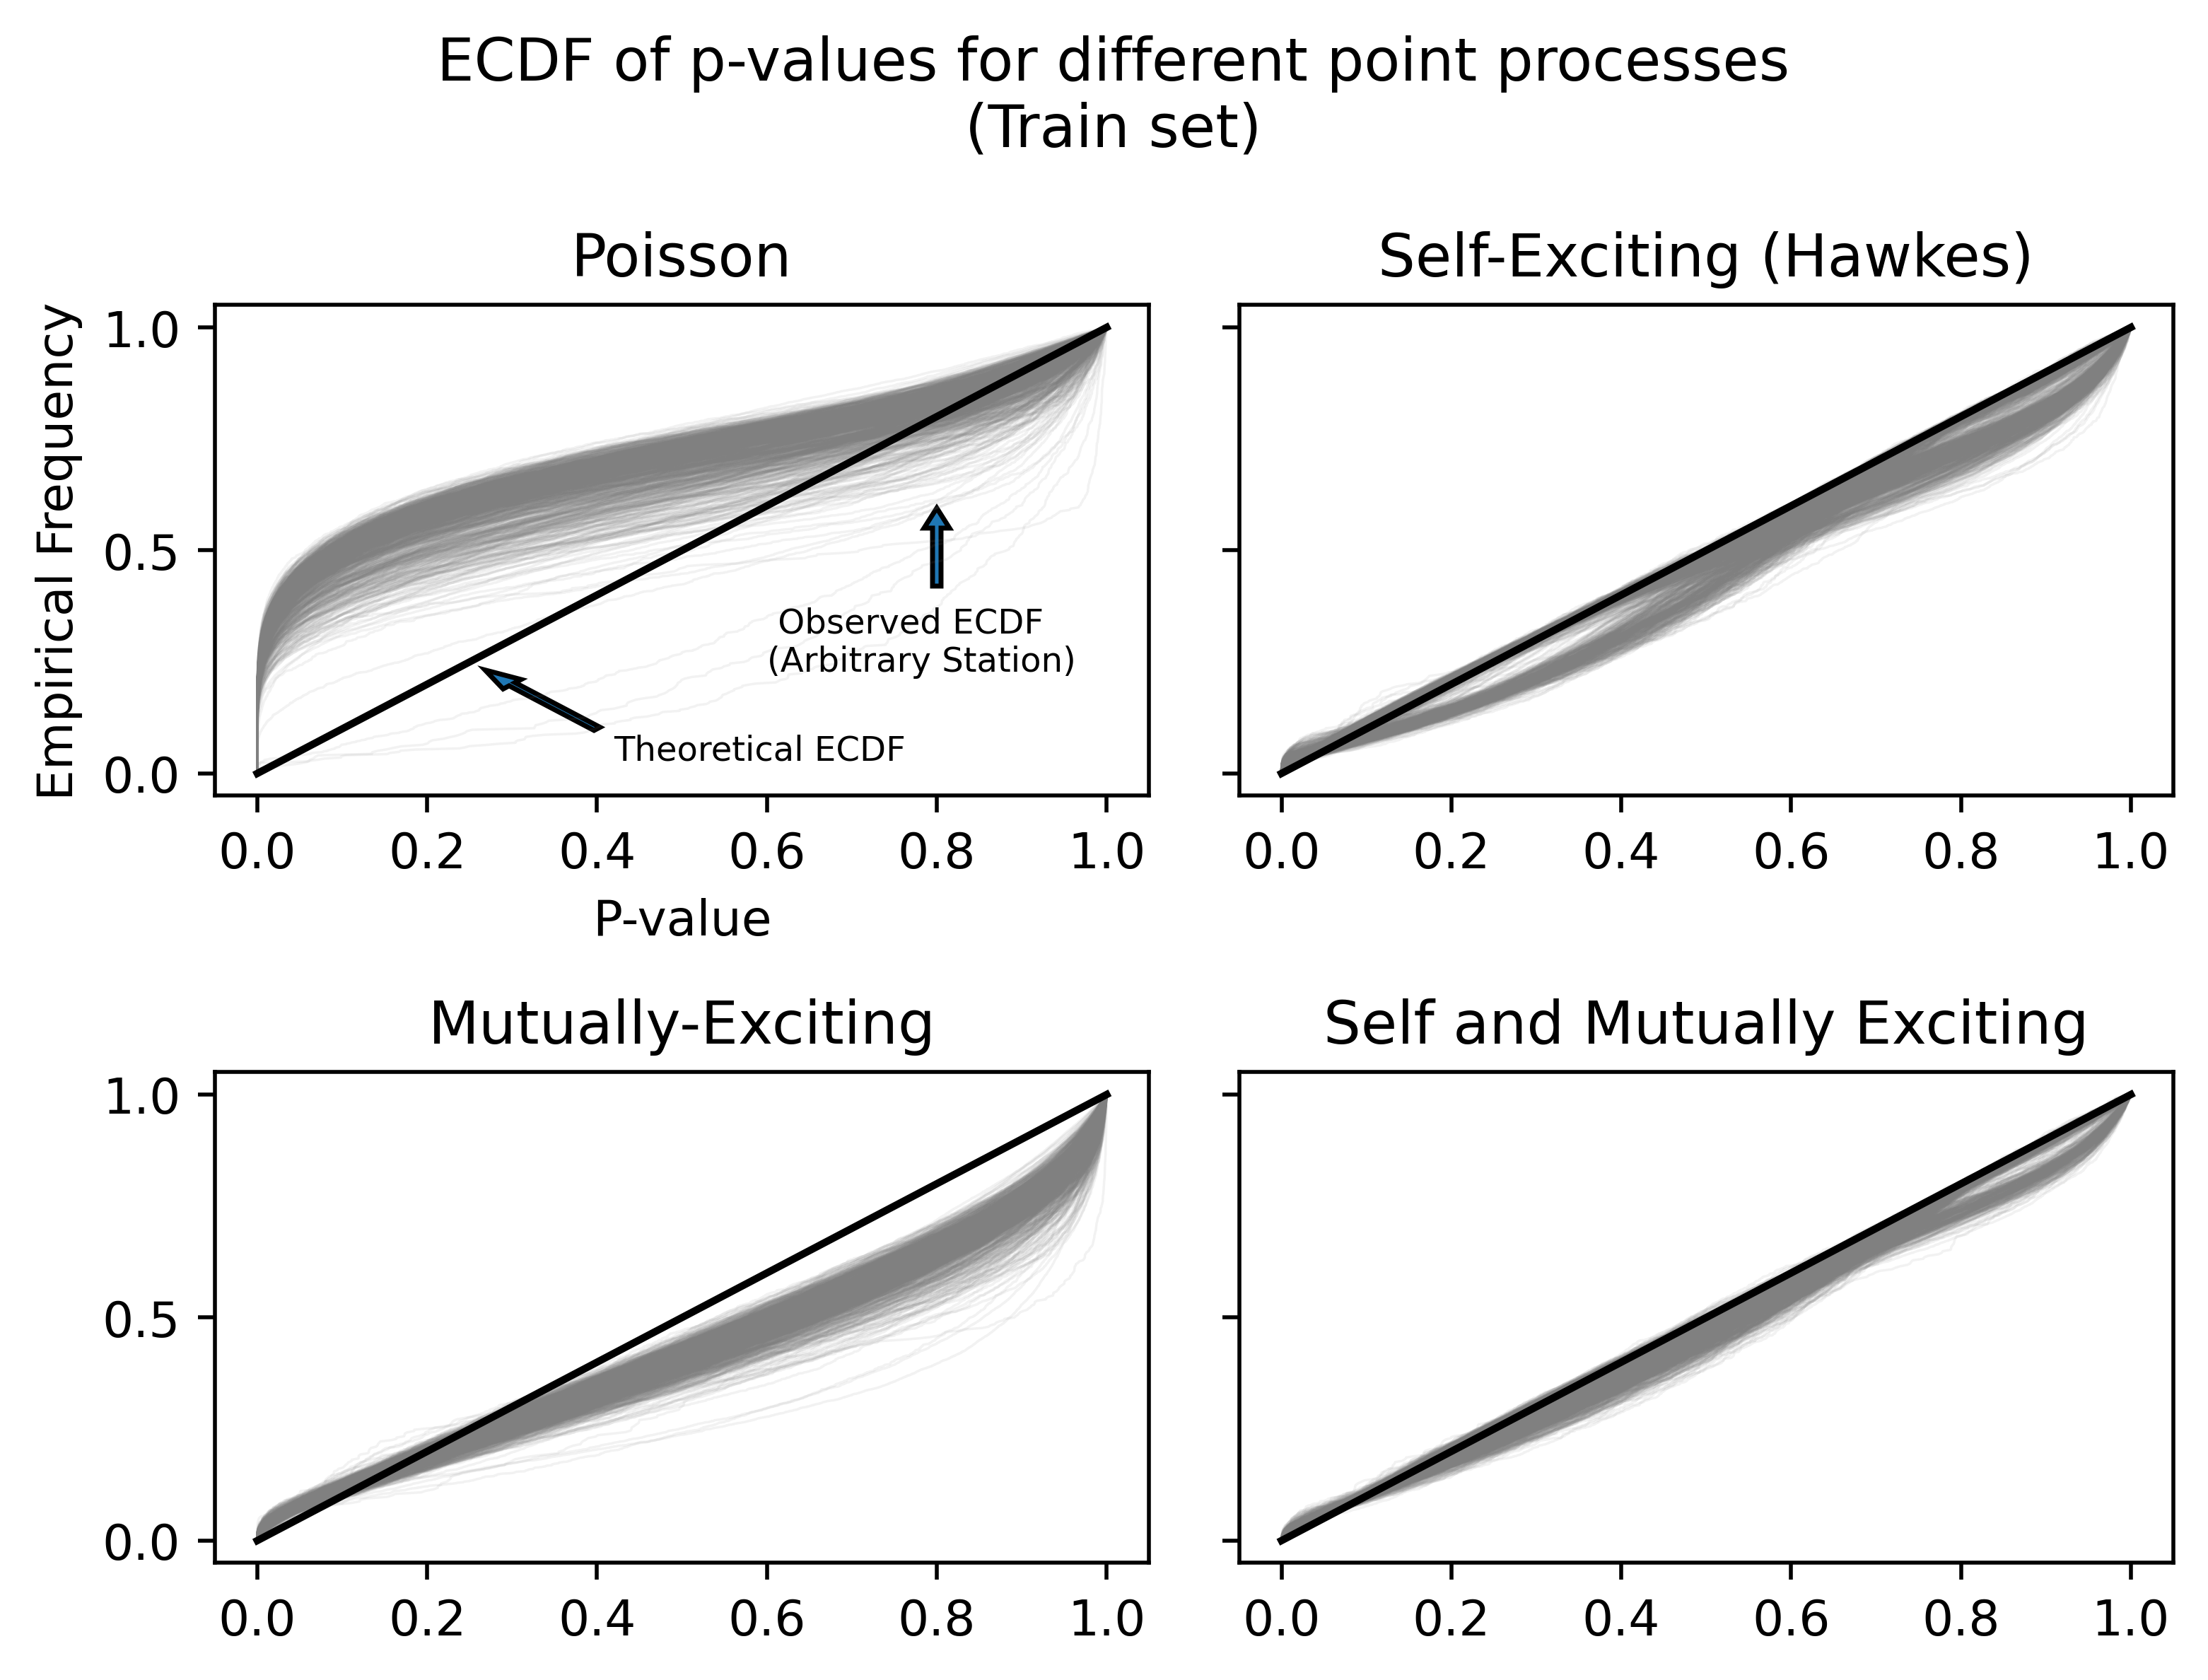

In [110]:
plt.rcParams['figure.dpi'] = 500
fig, axs = plt.subplots(2, 2, sharey=True)
fig.suptitle('ECDF of p-values for different point processes\n(Train set)')
plot_ecdf_M1()
plot_ecdf_M2()
plot_ecdf_M3()
plot_ecdf_M4()
plt.tight_layout()
plt.show()

### KS Boxplot

In [111]:
M1_ks_array_train = np.asarray(list(M1_ks_dict_train.values()))
M2_ks_array_train = np.asarray(list(M2_ks_dict_train.values()))
M3_ks_array_train = np.asarray(list(M3_ks_dict_train.values()))
M4_ks_array_train = np.asarray(list(M4_ks_dict_train.values()))
labels = ['Poisson', 'Self-Exciting\n(Hawkes)', 'Mutually-Exciting', 'Self-and-Mutually\nExciting']


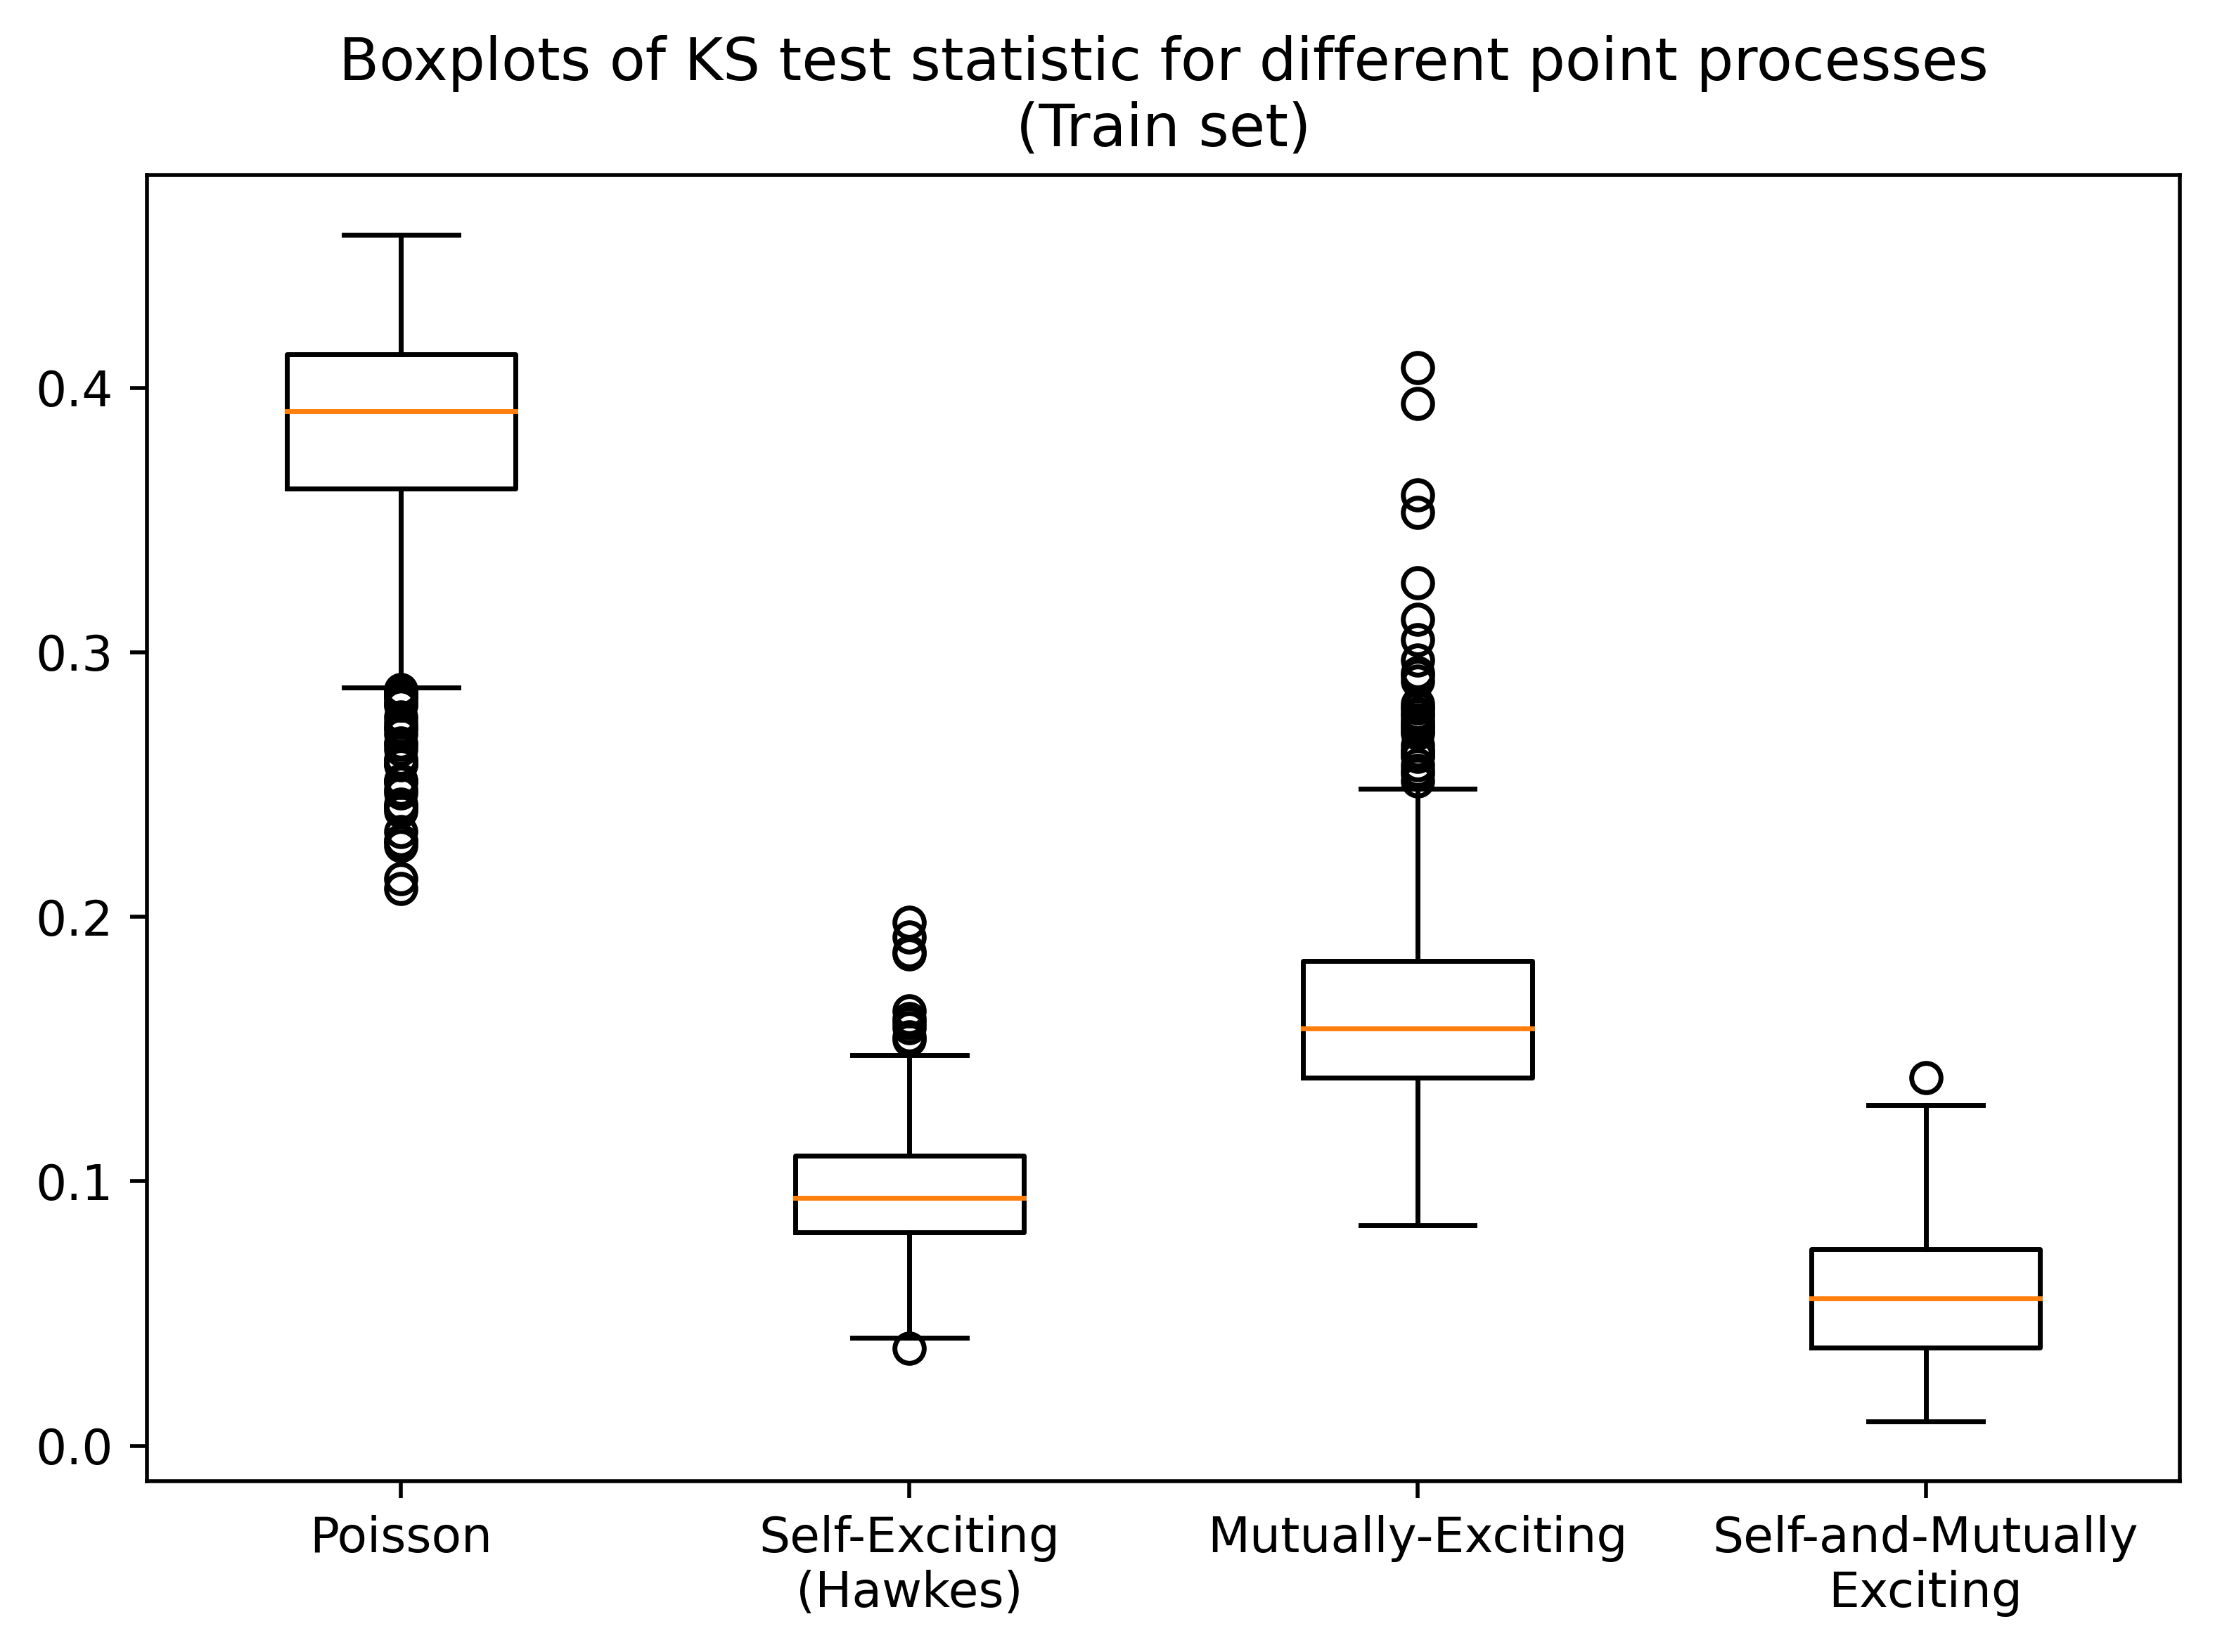

In [112]:
plt.boxplot([M1_ks_array_train, M2_ks_array_train, M3_ks_array_train, M4_ks_array_train], labels=labels)
plt.title("Boxplots of KS test statistic for different point processes\n(Train set)")
plt.tight_layout()
plt.show()

### Joined p-value histogram

In [113]:
def lblFormat(n, pos):
    return str(int(n / 1e3))
lblFormatter = FuncFormatter(lblFormat)

In [114]:
def plot_M1_joined_p_value_hist():
    M1_joined_p_values = join_p_values(M1_p_value_dict_train)
    n1, bins, patches = axs[0, 0].hist(M1_joined_p_values, bins=100)
    ax = axs[0,0].get_yaxis()
    def lblFormat_M1(n1, pos):
        return str(int(n1 / 1e3))
    lblFormatter_M1 = FuncFormatter(lblFormat_M1)
    ax.set_major_formatter(lblFormatter_M1)
    axs[0, 0].set_title("Poisson")
    axs[0, 0].set_xlabel("P-value")
    axs[0, 0].set_ylabel("Count (Thousands)")

def plot_M2_joined_p_value_hist():
    M2_joined_p_values = join_p_values(M2_p_value_dict_train)
    n2, bins, patches = axs[0, 1].hist(M2_joined_p_values, bins=100)
    ax = axs[0,1].get_yaxis()
    def lblFormat_M2(n2, pos):
        return str(int(n2 / 1e3))
    lblFormatter_M2 = FuncFormatter(lblFormat_M2)
    ax.set_major_formatter(lblFormatter_M2)
    axs[0, 1].set_title("Self-Exciting (Hawkes)")

def plot_M3_joined_p_value_hist():
    M3_joined_p_values = join_p_values(M3_p_value_dict_train)
    n3, bins, patches = axs[1, 0].hist(M3_joined_p_values, bins=100)
    ax = axs[1,0].get_yaxis()
    def lblFormat_M3(n3, pos):
        return str(int(n3 / 1e3))
    lblFormatter_M3 = FuncFormatter(lblFormat_M3)
    ax.set_major_formatter(lblFormatter_M3)
    axs[1, 0].set_title("Mutually-Exciting")

def plot_M4_joined_p_value_hist():
    M4_joined_p_values = join_p_values(M4_p_value_dict_train)
    n4, bins, patches = axs[1, 1].hist(M4_joined_p_values, bins=100)
    ax = axs[1,1].get_yaxis()
    def lblFormat_M4(n4, pos):
        return str(int(n4 / 1e3))
    lblFormatter_M4 = FuncFormatter(lblFormat_M4)
    ax.set_major_formatter(lblFormatter_M4)
    axs[1, 1].set_title("Mutually and Self Exciting")

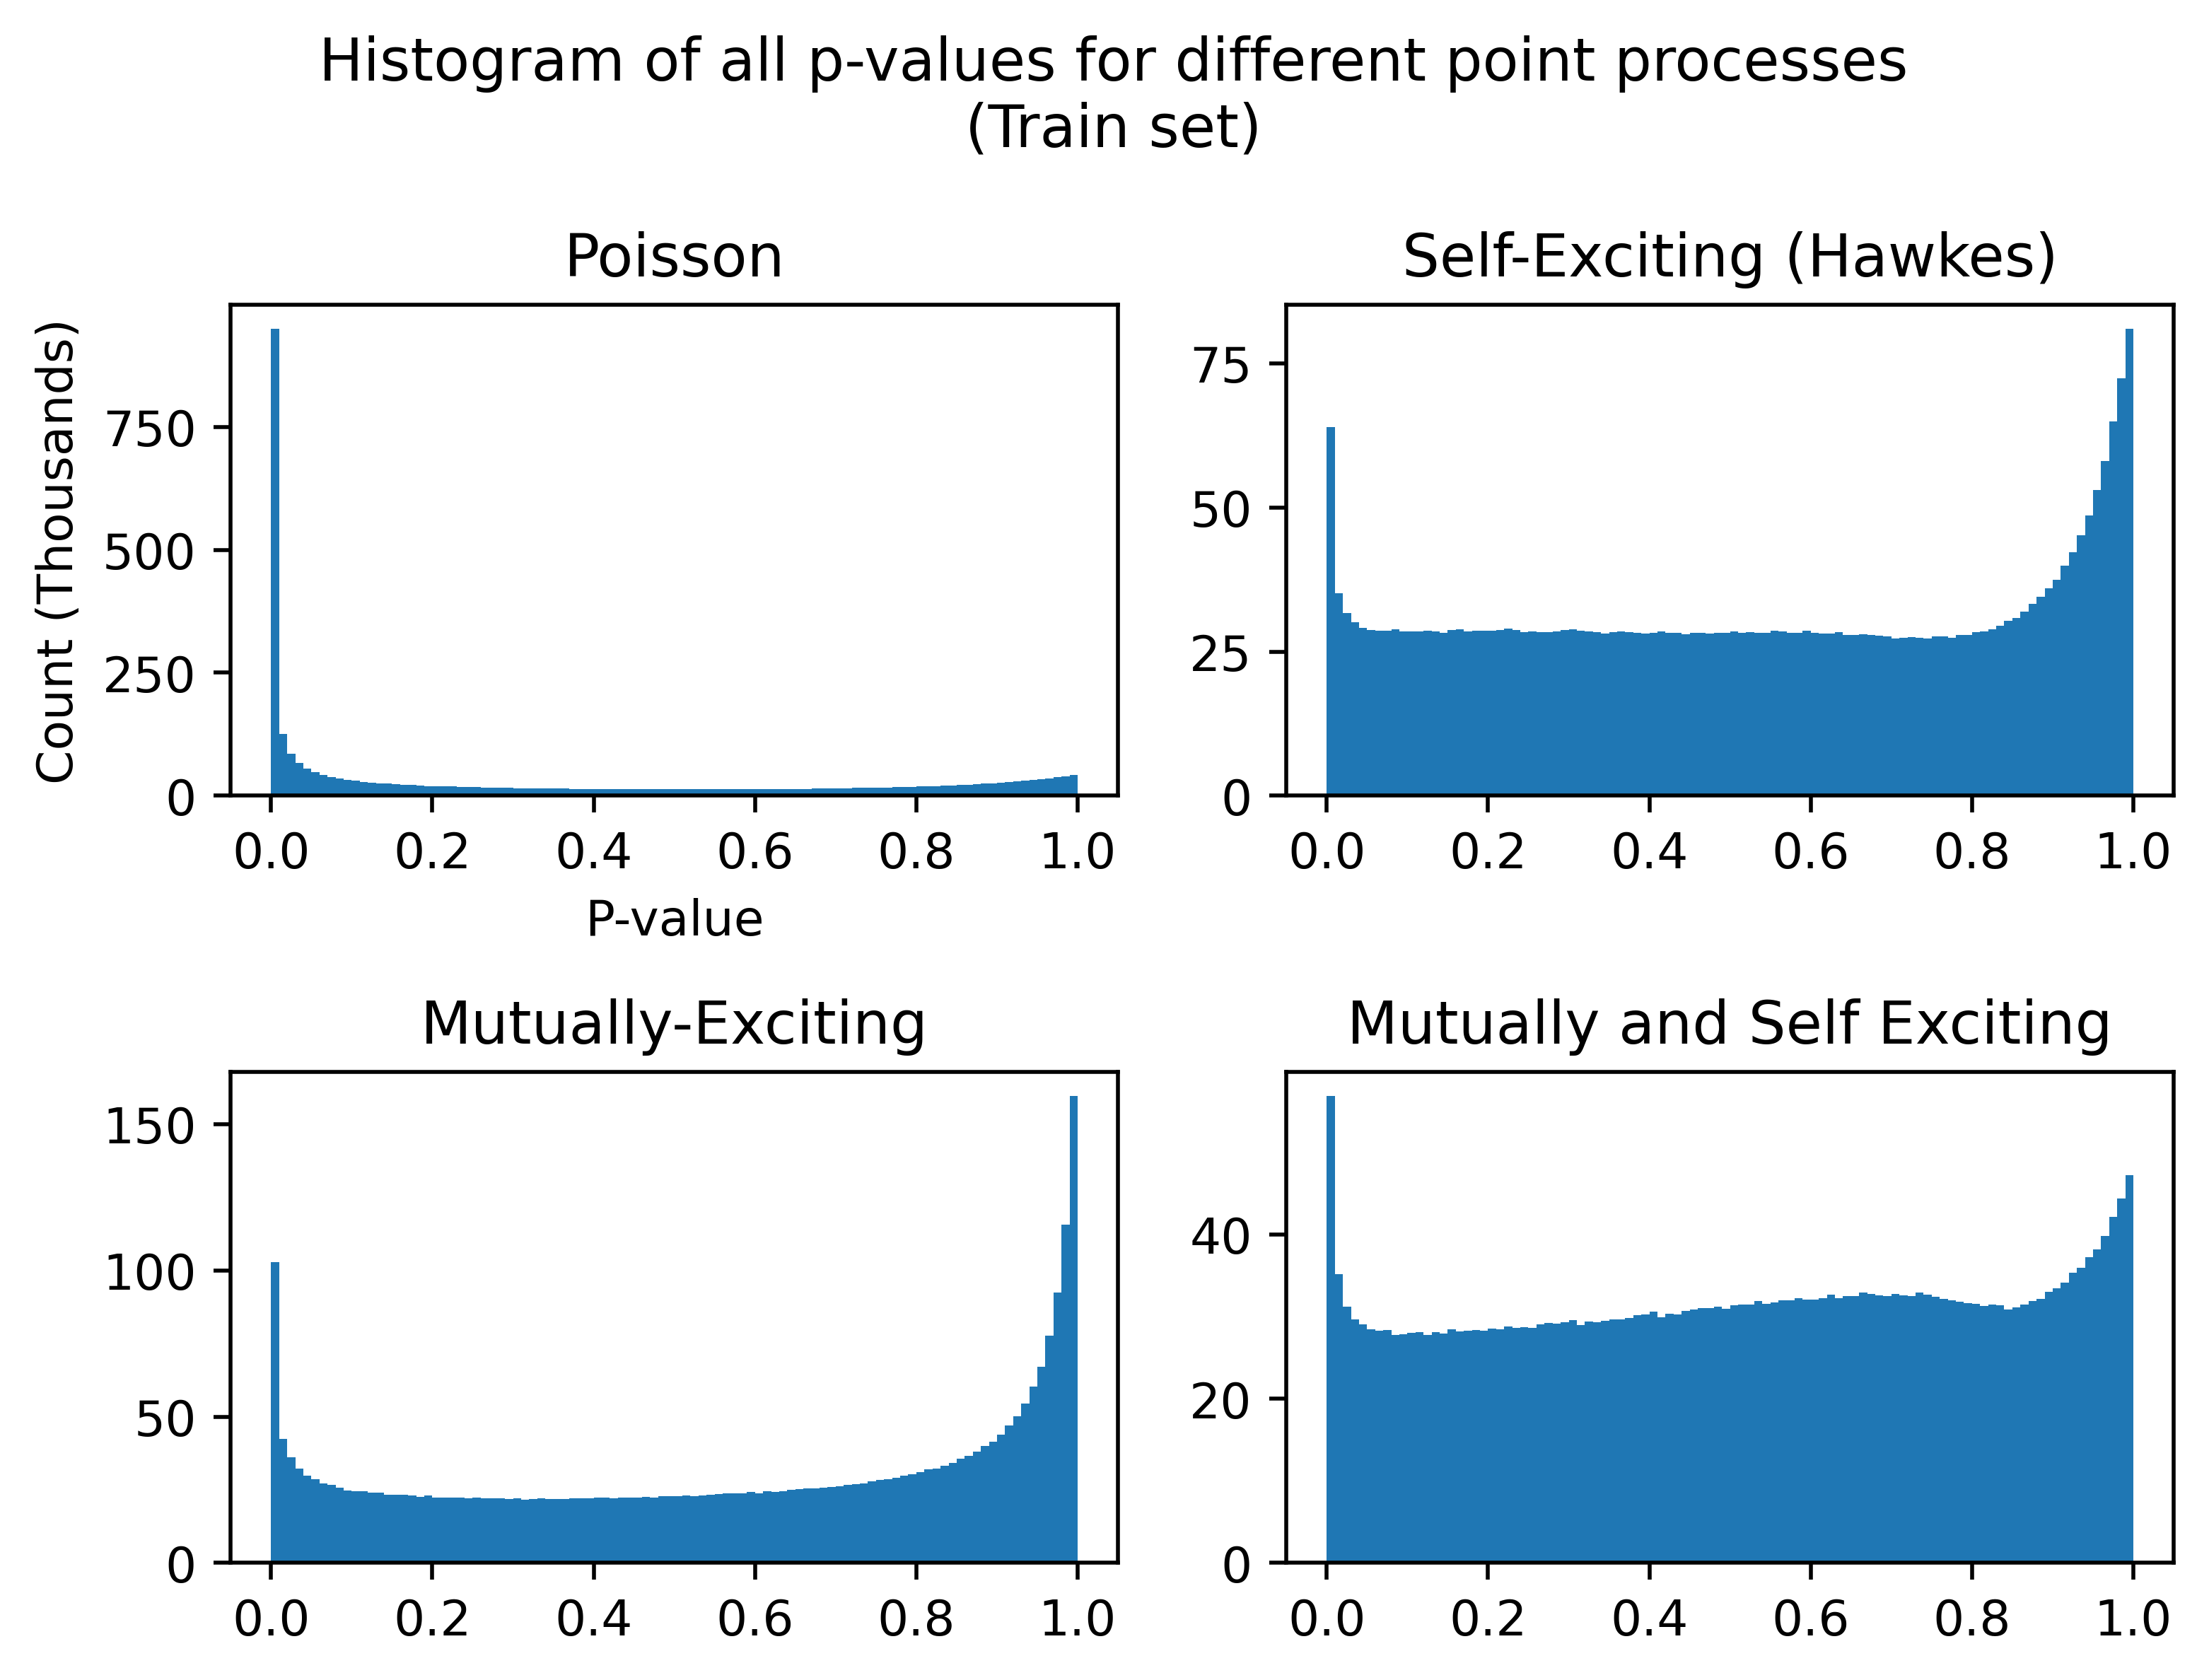

In [115]:
plt.rcParams['figure.dpi'] = 500
fig, axs = plt.subplots(2, 2)
fig.suptitle('Histogram of all p-values for different point processes\n(Train set)')
plot_M1_joined_p_value_hist()
plot_M2_joined_p_value_hist()
plot_M3_joined_p_value_hist()
plot_M4_joined_p_value_hist()
plt.tight_layout()
plt.show()

### Popularity Scatter plots

In [116]:
M1_pop_array_train = np.asarray(list(M1_popularity_dict_train.values()))
M2_pop_array_train = np.asarray(list(M2_popularity_dict_train.values()))
M3_pop_array_train = np.asarray(list(M3_popularity_dict_train.values()))
M4_pop_array_train = np.asarray(list(M4_popularity_dict_train.values()))

In [117]:
m1_train, b1_train = np.polyfit(M1_pop_array_train, M1_ks_array_train, 1)
m2_train, b2_train = np.polyfit(M2_pop_array_train, M2_ks_array_train, 1)
m3_train, b3_train = np.polyfit(M3_pop_array_train, M3_ks_array_train, 1)
m4_train, b4_train = np.polyfit(M4_pop_array_train, M4_ks_array_train, 1)

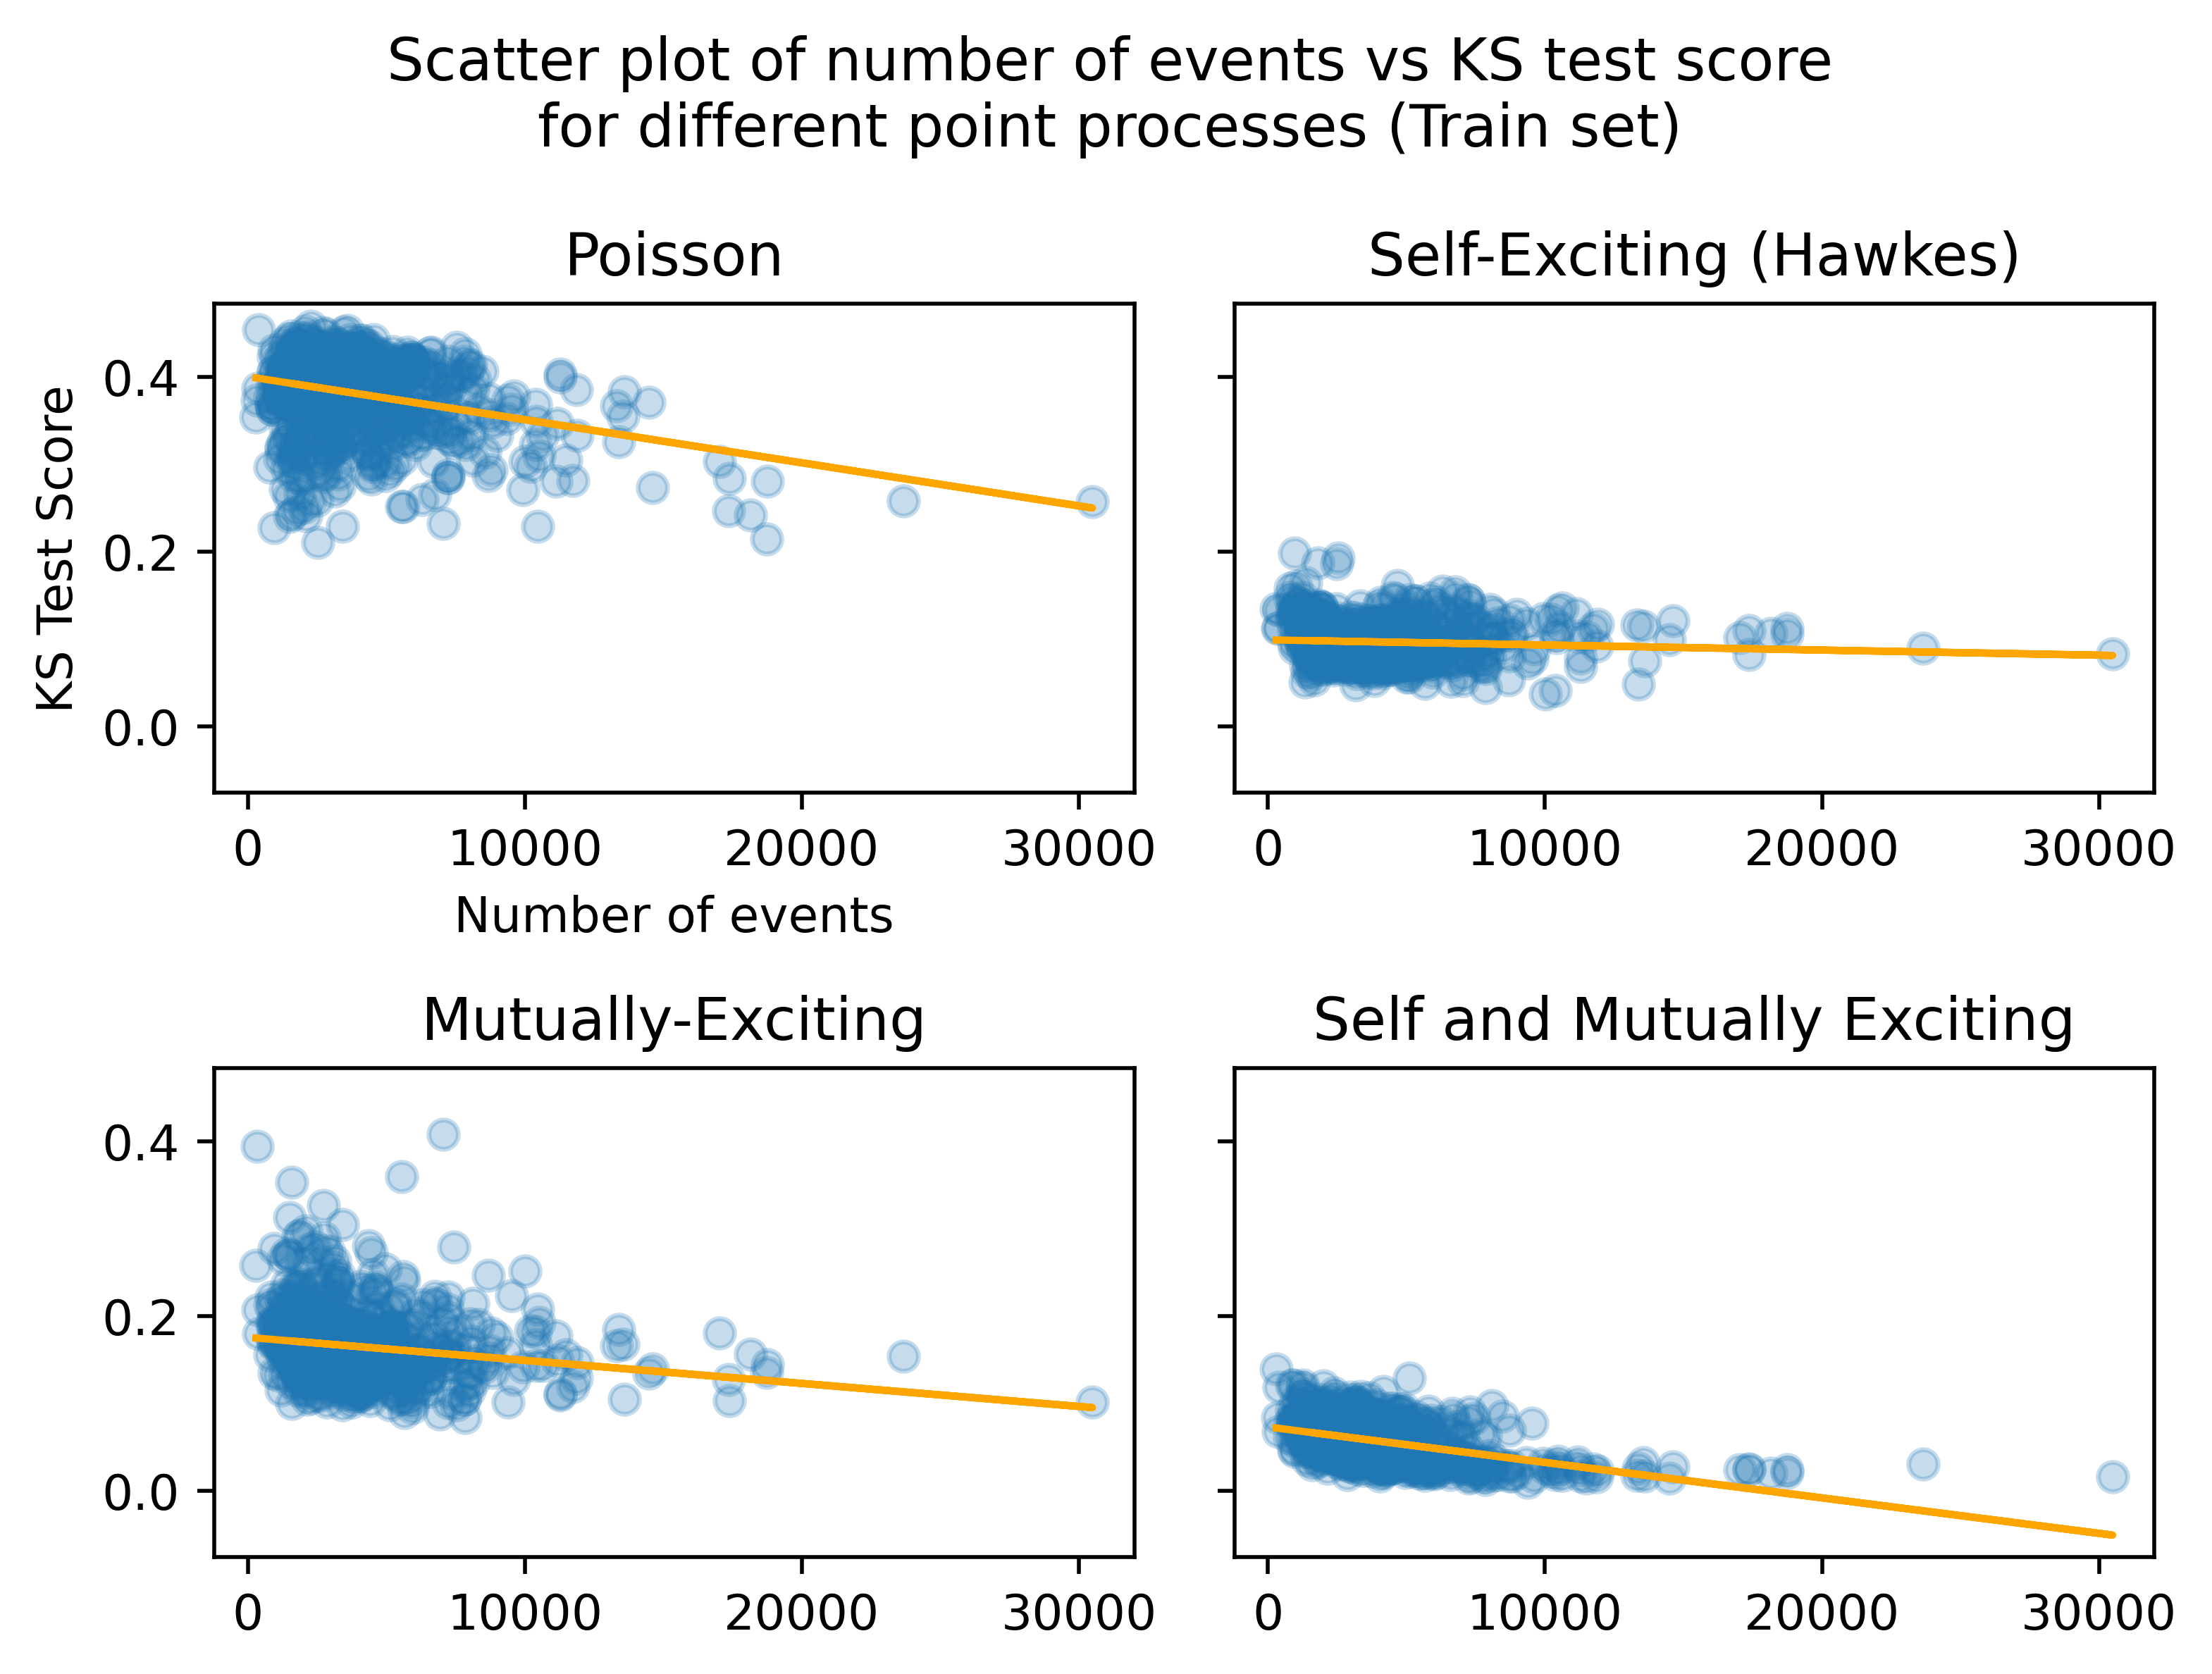

In [118]:
plt.rcParams['figure.dpi'] = 500
fig, axs = plt.subplots(2, 2, sharey=True)
fig.suptitle('Scatter plot of number of events vs KS test score\nfor different point processes (Train set)')

axs[0, 0].set_title("Poisson")
axs[0, 0].set_ylabel("KS Test Score")
axs[0, 0].set_xlabel("Number of events")
axs[0, 0].scatter(M1_pop_array_train, M1_ks_array_train, alpha=0.25)
axs[0, 0].plot(M1_pop_array_train, m1_train*M1_pop_array_train + b1_train, color="orange")

axs[0, 1].set_title("Self-Exciting (Hawkes)")
axs[0, 1].scatter(M2_pop_array_train, M2_ks_array_train, alpha=0.25)
axs[0, 1].plot(M2_pop_array_train, m2_train*M2_pop_array_train + b2_train, color="orange")

axs[1, 0].set_title("Mutually-Exciting")
axs[1, 0].scatter(M3_pop_array_train, M3_ks_array_train, alpha=0.25)
axs[1, 0].plot(M3_pop_array_train, m3_train*M3_pop_array_train + b3_train, color="orange")

axs[1, 1].set_title("Self and Mutually Exciting")
axs[1, 1].scatter(M4_pop_array_train, M4_ks_array_train, alpha=0.25)
axs[1, 1].plot(M4_pop_array_train, m4_train*M4_pop_array_train + b4_train, color="orange")

plt.tight_layout()
plt.show()



### Test for independence (Train)

## Making the figures (Test)

### ECDF Plot

In [119]:
def plot_ecdf_M1():
    for station, pvals in M1_p_value_dict_test.items():
        x,y = ecdf(pvals)
        axs[0, 0].plot(x,y, alpha=0.1, linewidth=0.5, color="gray")
    axs[0, 0].arrow(0.4,0.1, -0.10,0.10,width=0.01)
    axs[0, 0].annotate( "Theoretical ECDF", xy =  (0.42,0.03), fontsize="x-small")
    axs[0, 0].annotate( " Observed ECDF\n(Arbitrary Station)", xy =  (0.6,0.23), fontsize="x-small")
    axs[0, 0].arrow(0.8,0.42, 0.0,0.13,width=0.01)
    axs[0, 0].plot([0,1], [0,1], color="black")
    axs[0, 0].set_title("Poisson")
    axs[0, 0].set_xlabel("P-value")
    axs[0, 0].set_ylabel("Empirical Frequency")
def plot_ecdf_M2():
    for station, pvals in M2_p_value_dict_test.items():
        x,y = ecdf(pvals)
        axs[0, 1].plot(x,y, alpha=0.1, linewidth=0.5, color="gray")
    axs[0, 1].plot([0,1], [0,1], color="black")
    axs[0, 1].set_title("Self-Exciting (Hawkes)")
def plot_ecdf_M3():
    for station, pvals in M3_p_value_dict_test.items():
        x,y = ecdf(pvals)
        axs[1, 0].plot(x,y, alpha=0.1, linewidth=0.5, color="gray")
    axs[1, 0].plot([0,1], [0,1], color="black")
    axs[1, 0].set_title("Mutually-Exciting")
def plot_ecdf_M4():
    for station, pvals in M4_p_value_dict_test.items():
        x,y = ecdf(pvals)
        axs[1, 1].plot(x,y, alpha=0.1, linewidth=0.5, color="gray")
    axs[1, 1].plot([0,1], [0,1], color="black")
    axs[1, 1].set_title("Self and Mutually Exciting")

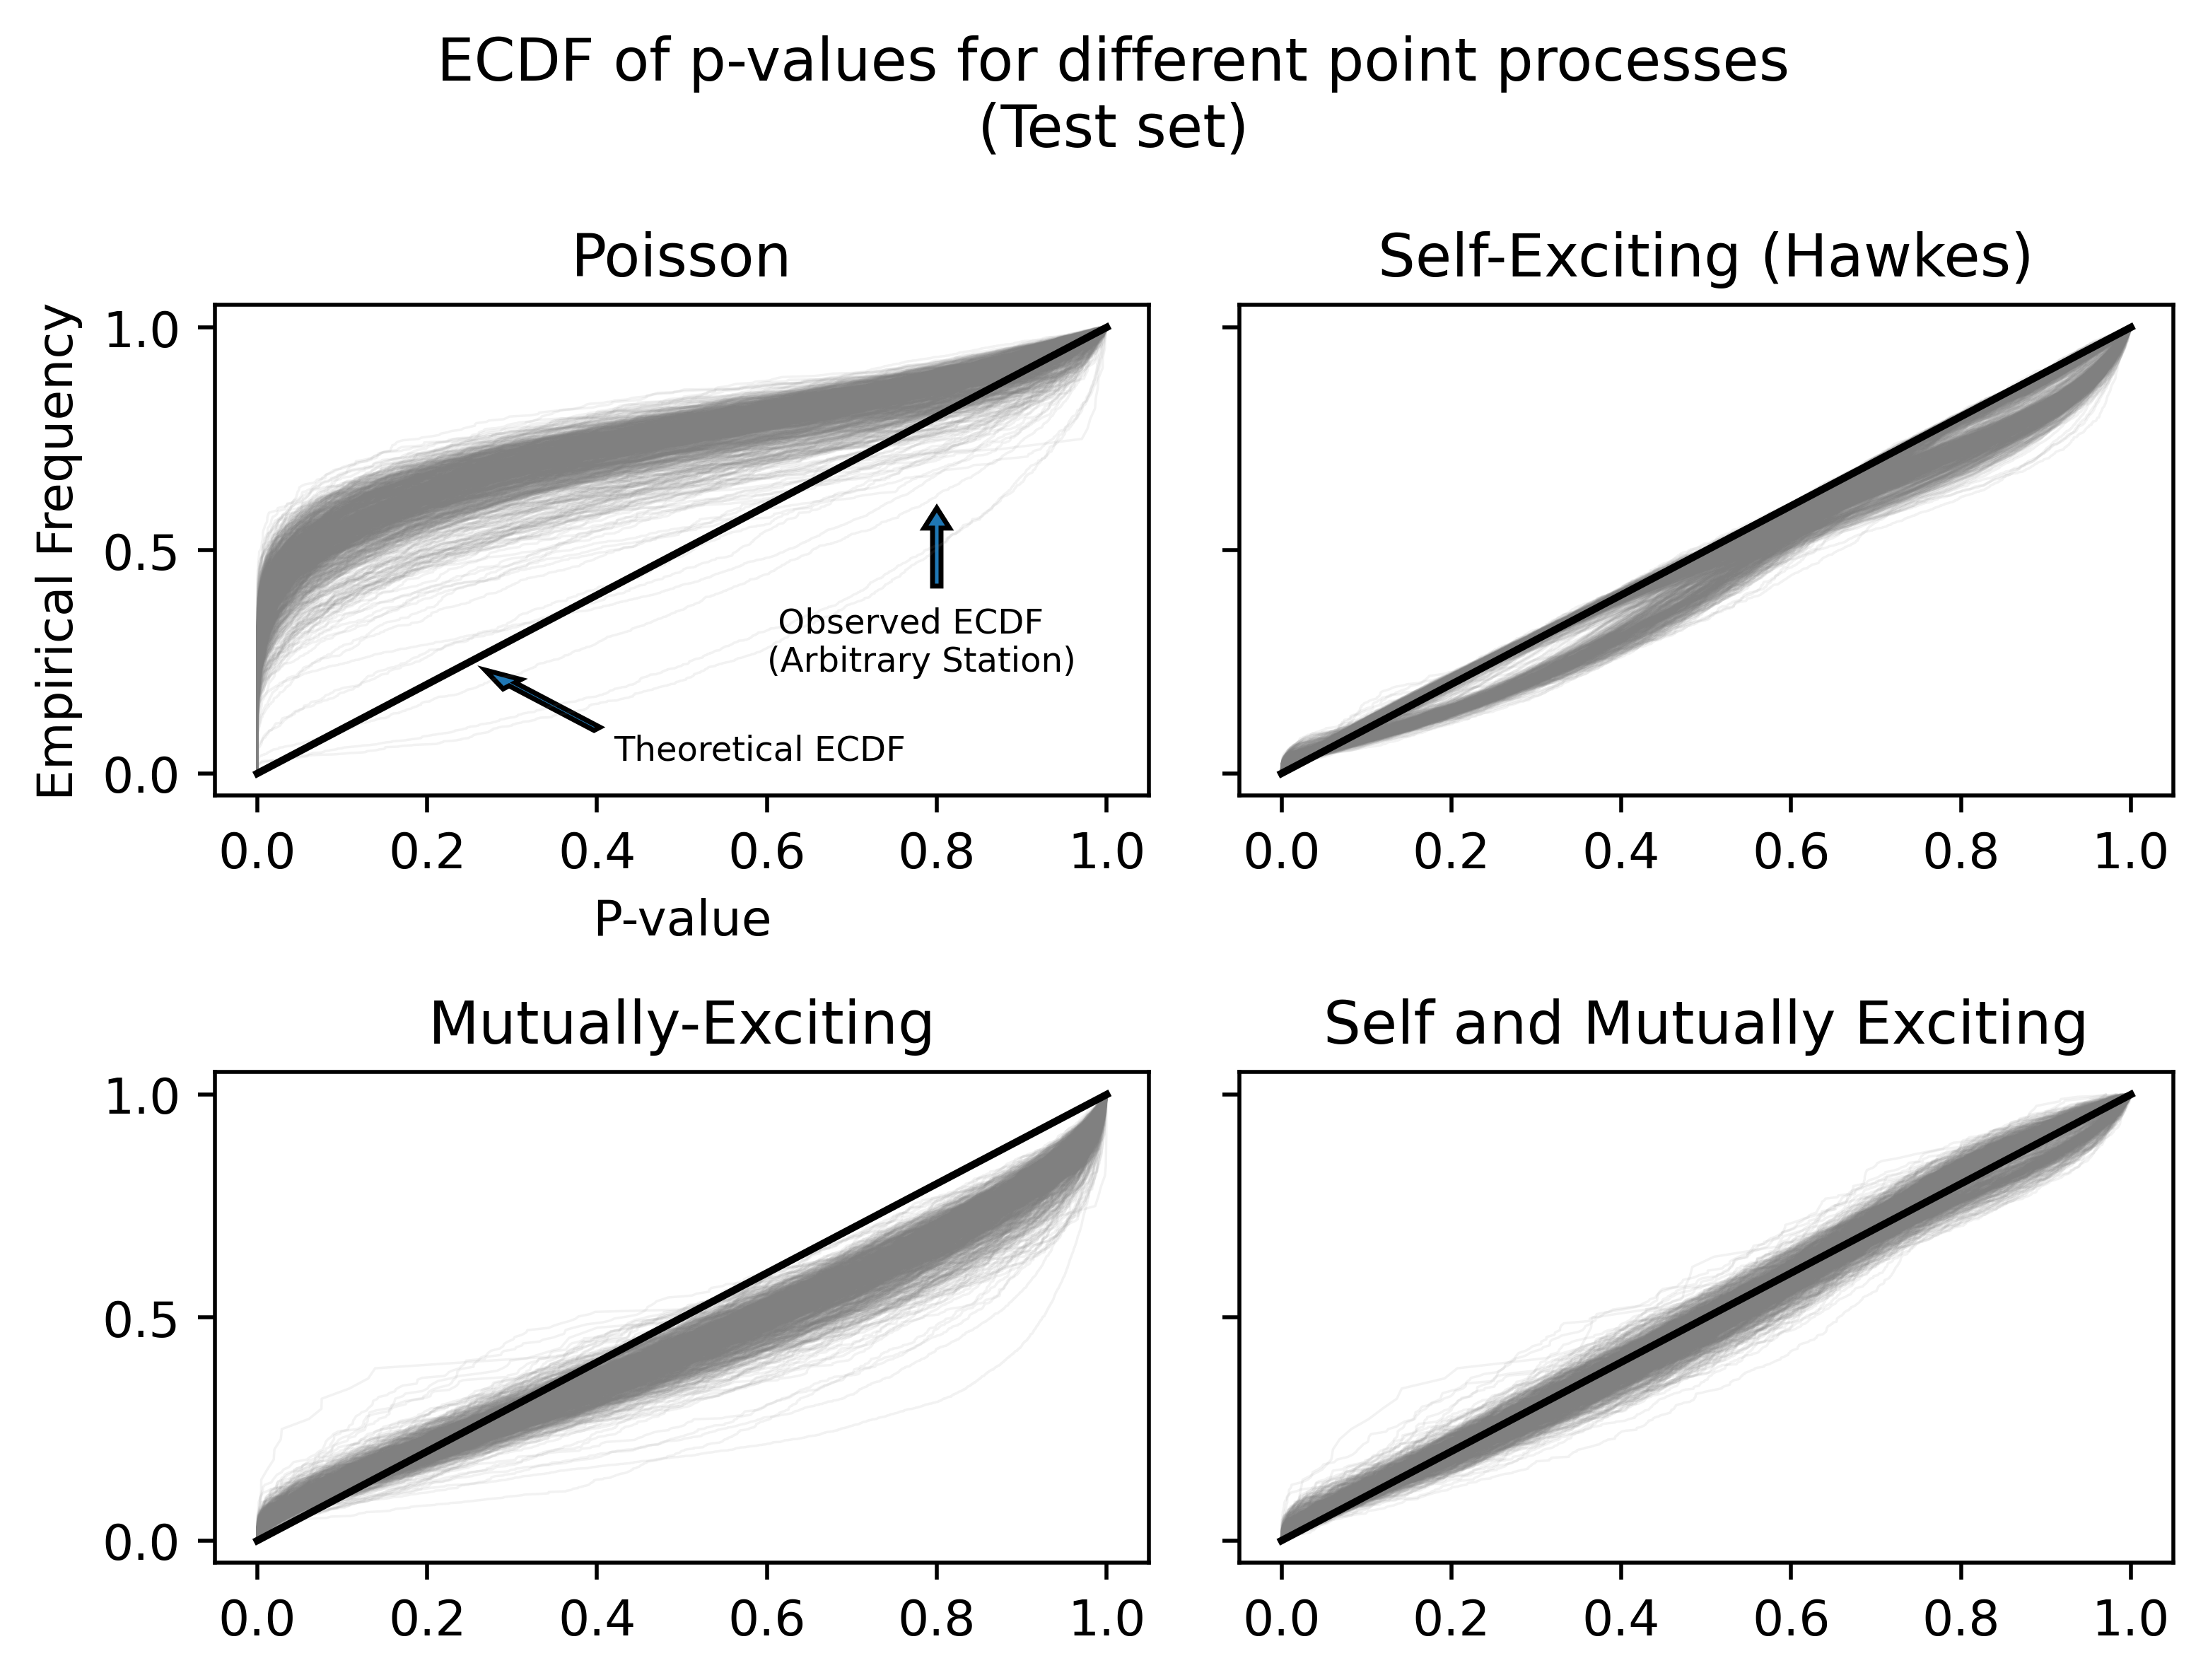

In [120]:
plt.rcParams['figure.dpi'] = 500
fig, axs = plt.subplots(2, 2, sharey=True)
fig.suptitle('ECDF of p-values for different point processes\n(Test set)')
plot_ecdf_M1()
plot_ecdf_M2()
plot_ecdf_M3()
plot_ecdf_M4()
plt.tight_layout()
plt.show()

### KS Boxplot

In [121]:
M1_ks_array_test = np.asarray(list(M1_ks_dict_test.values()))
M2_ks_array_test = np.asarray(list(M2_ks_dict_test.values()))
M3_ks_array_test = np.asarray(list(M3_ks_dict_test.values()))
M4_ks_array_test = np.asarray(list(M4_ks_dict_test.values()))
labels = ['Poisson', 'Self-Exciting\n(Hawkes)', 'Mutually-Exciting', 'Self-and-Mutually\nExciting']

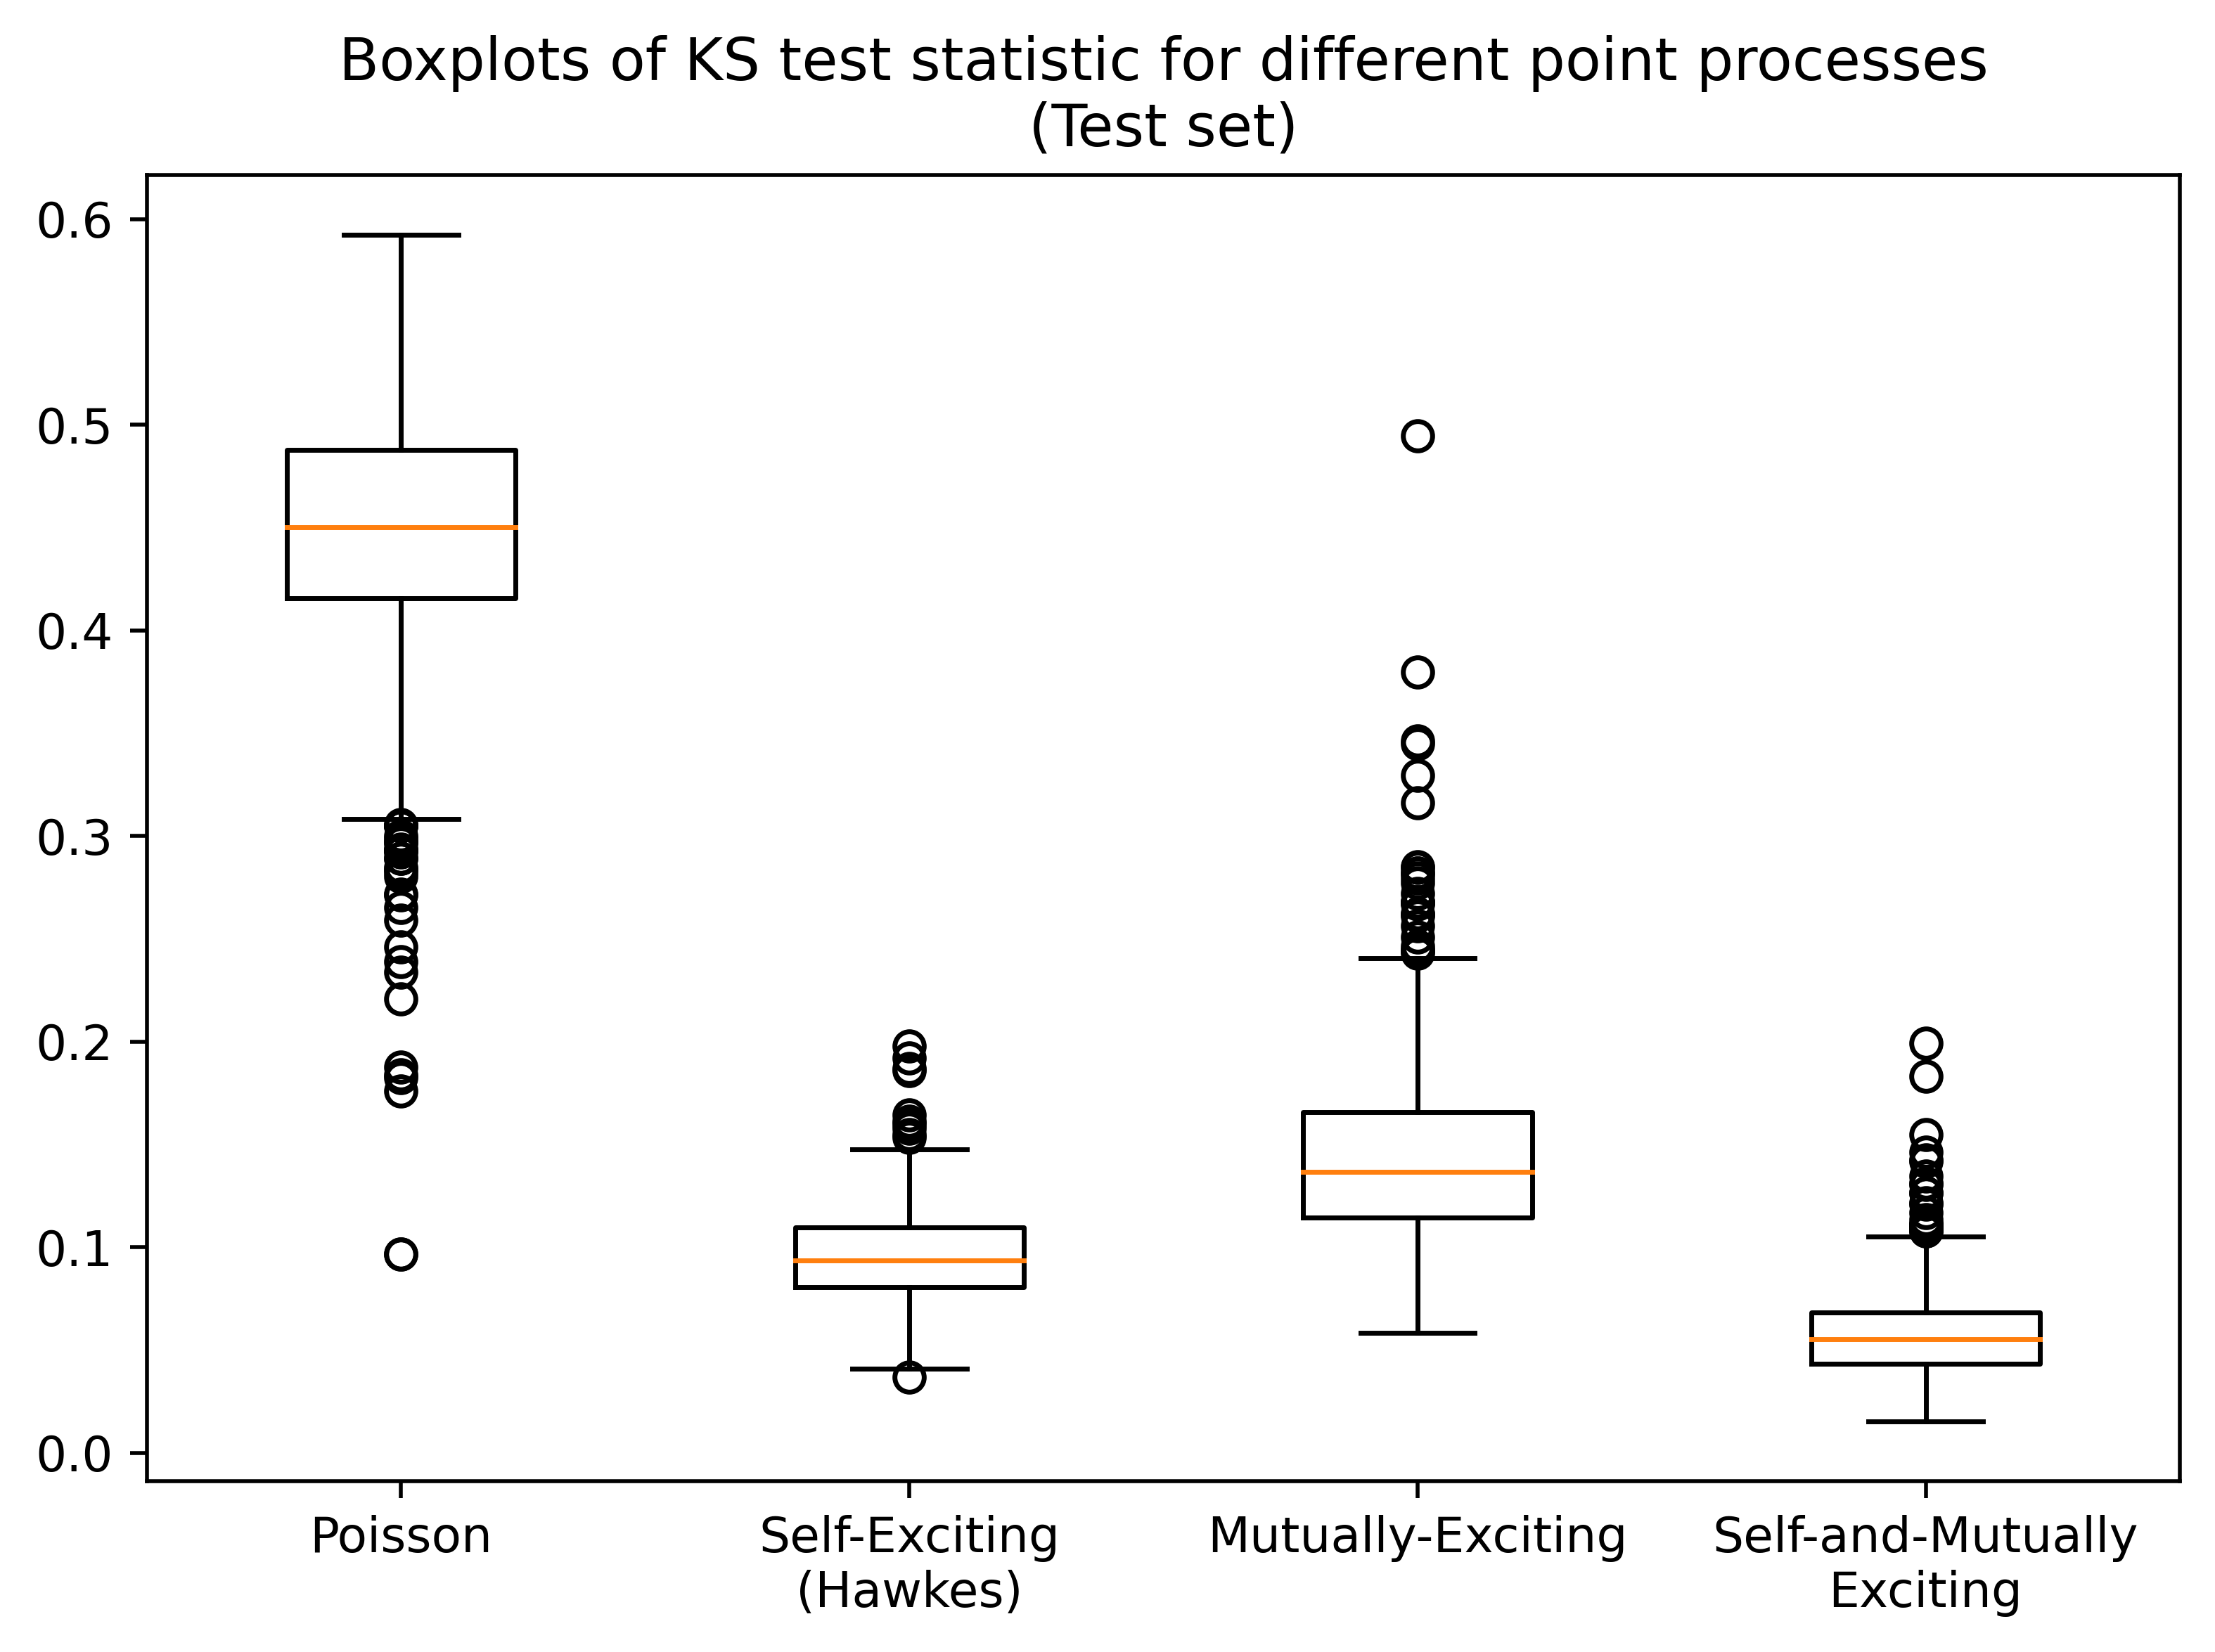

In [122]:
plt.boxplot([M1_ks_array_test, M2_ks_array_test, M3_ks_array_test, M4_ks_array_test], labels=labels)
plt.title("Boxplots of KS test statistic for different point processes\n(Test set)")
plt.tight_layout()
plt.show()

### Joined p-value histogram

In [123]:
def lblFormat(n, pos):
    return str(int(n / 1e3))
lblFormatter = FuncFormatter(lblFormat)
def plot_M1_joined_p_value_hist():
    M1_joined_p_values = join_p_values(M1_p_value_dict_test)
    n1, bins, patches = axs[0, 0].hist(M1_joined_p_values, bins=100)
    ax = axs[0,0].get_yaxis()
    def lblFormat_M1(n1, pos):
        return str(int(n1 / 1e3))
    lblFormatter_M1 = FuncFormatter(lblFormat_M1)
    ax.set_major_formatter(lblFormatter_M1)
    axs[0, 0].set_title("Poisson")
    axs[0, 0].set_xlabel("P-value")
    axs[0, 0].set_ylabel("Count (Thousands)")

def plot_M2_joined_p_value_hist():
    M2_joined_p_values = join_p_values(M2_p_value_dict_test)
    n2, bins, patches = axs[0, 1].hist(M2_joined_p_values, bins=100)
    ax = axs[0,1].get_yaxis()
    def lblFormat_M2(n2, pos):
        return str(int(n2 / 1e3))
    lblFormatter_M2 = FuncFormatter(lblFormat_M2)
    ax.set_major_formatter(lblFormatter_M2)
    axs[0, 1].set_title("Self-Exciting (Hawkes)")

def plot_M3_joined_p_value_hist():
    M3_joined_p_values = join_p_values(M3_p_value_dict_test)
    n3, bins, patches = axs[1, 0].hist(M3_joined_p_values, bins=100)
    ax = axs[1,0].get_yaxis()
    def lblFormat_M3(n3, pos):
        return str(int(n3 / 1e3))
    lblFormatter_M3 = FuncFormatter(lblFormat_M3)
    ax.set_major_formatter(lblFormatter_M3)
    axs[1, 0].set_title("Mutually-Exciting")

def plot_M4_joined_p_value_hist():
    M4_joined_p_values = join_p_values(M4_p_value_dict_test)
    n4, bins, patches = axs[1, 1].hist(M4_joined_p_values, bins=100)
    ax = axs[1,1].get_yaxis()
    def lblFormat_M4(n4, pos):
        return str(int(n4 / 1e3))
    lblFormatter_M4 = FuncFormatter(lblFormat_M4)
    ax.set_major_formatter(lblFormatter_M4)
    axs[1, 1].set_title("Mutually and Self Exciting")

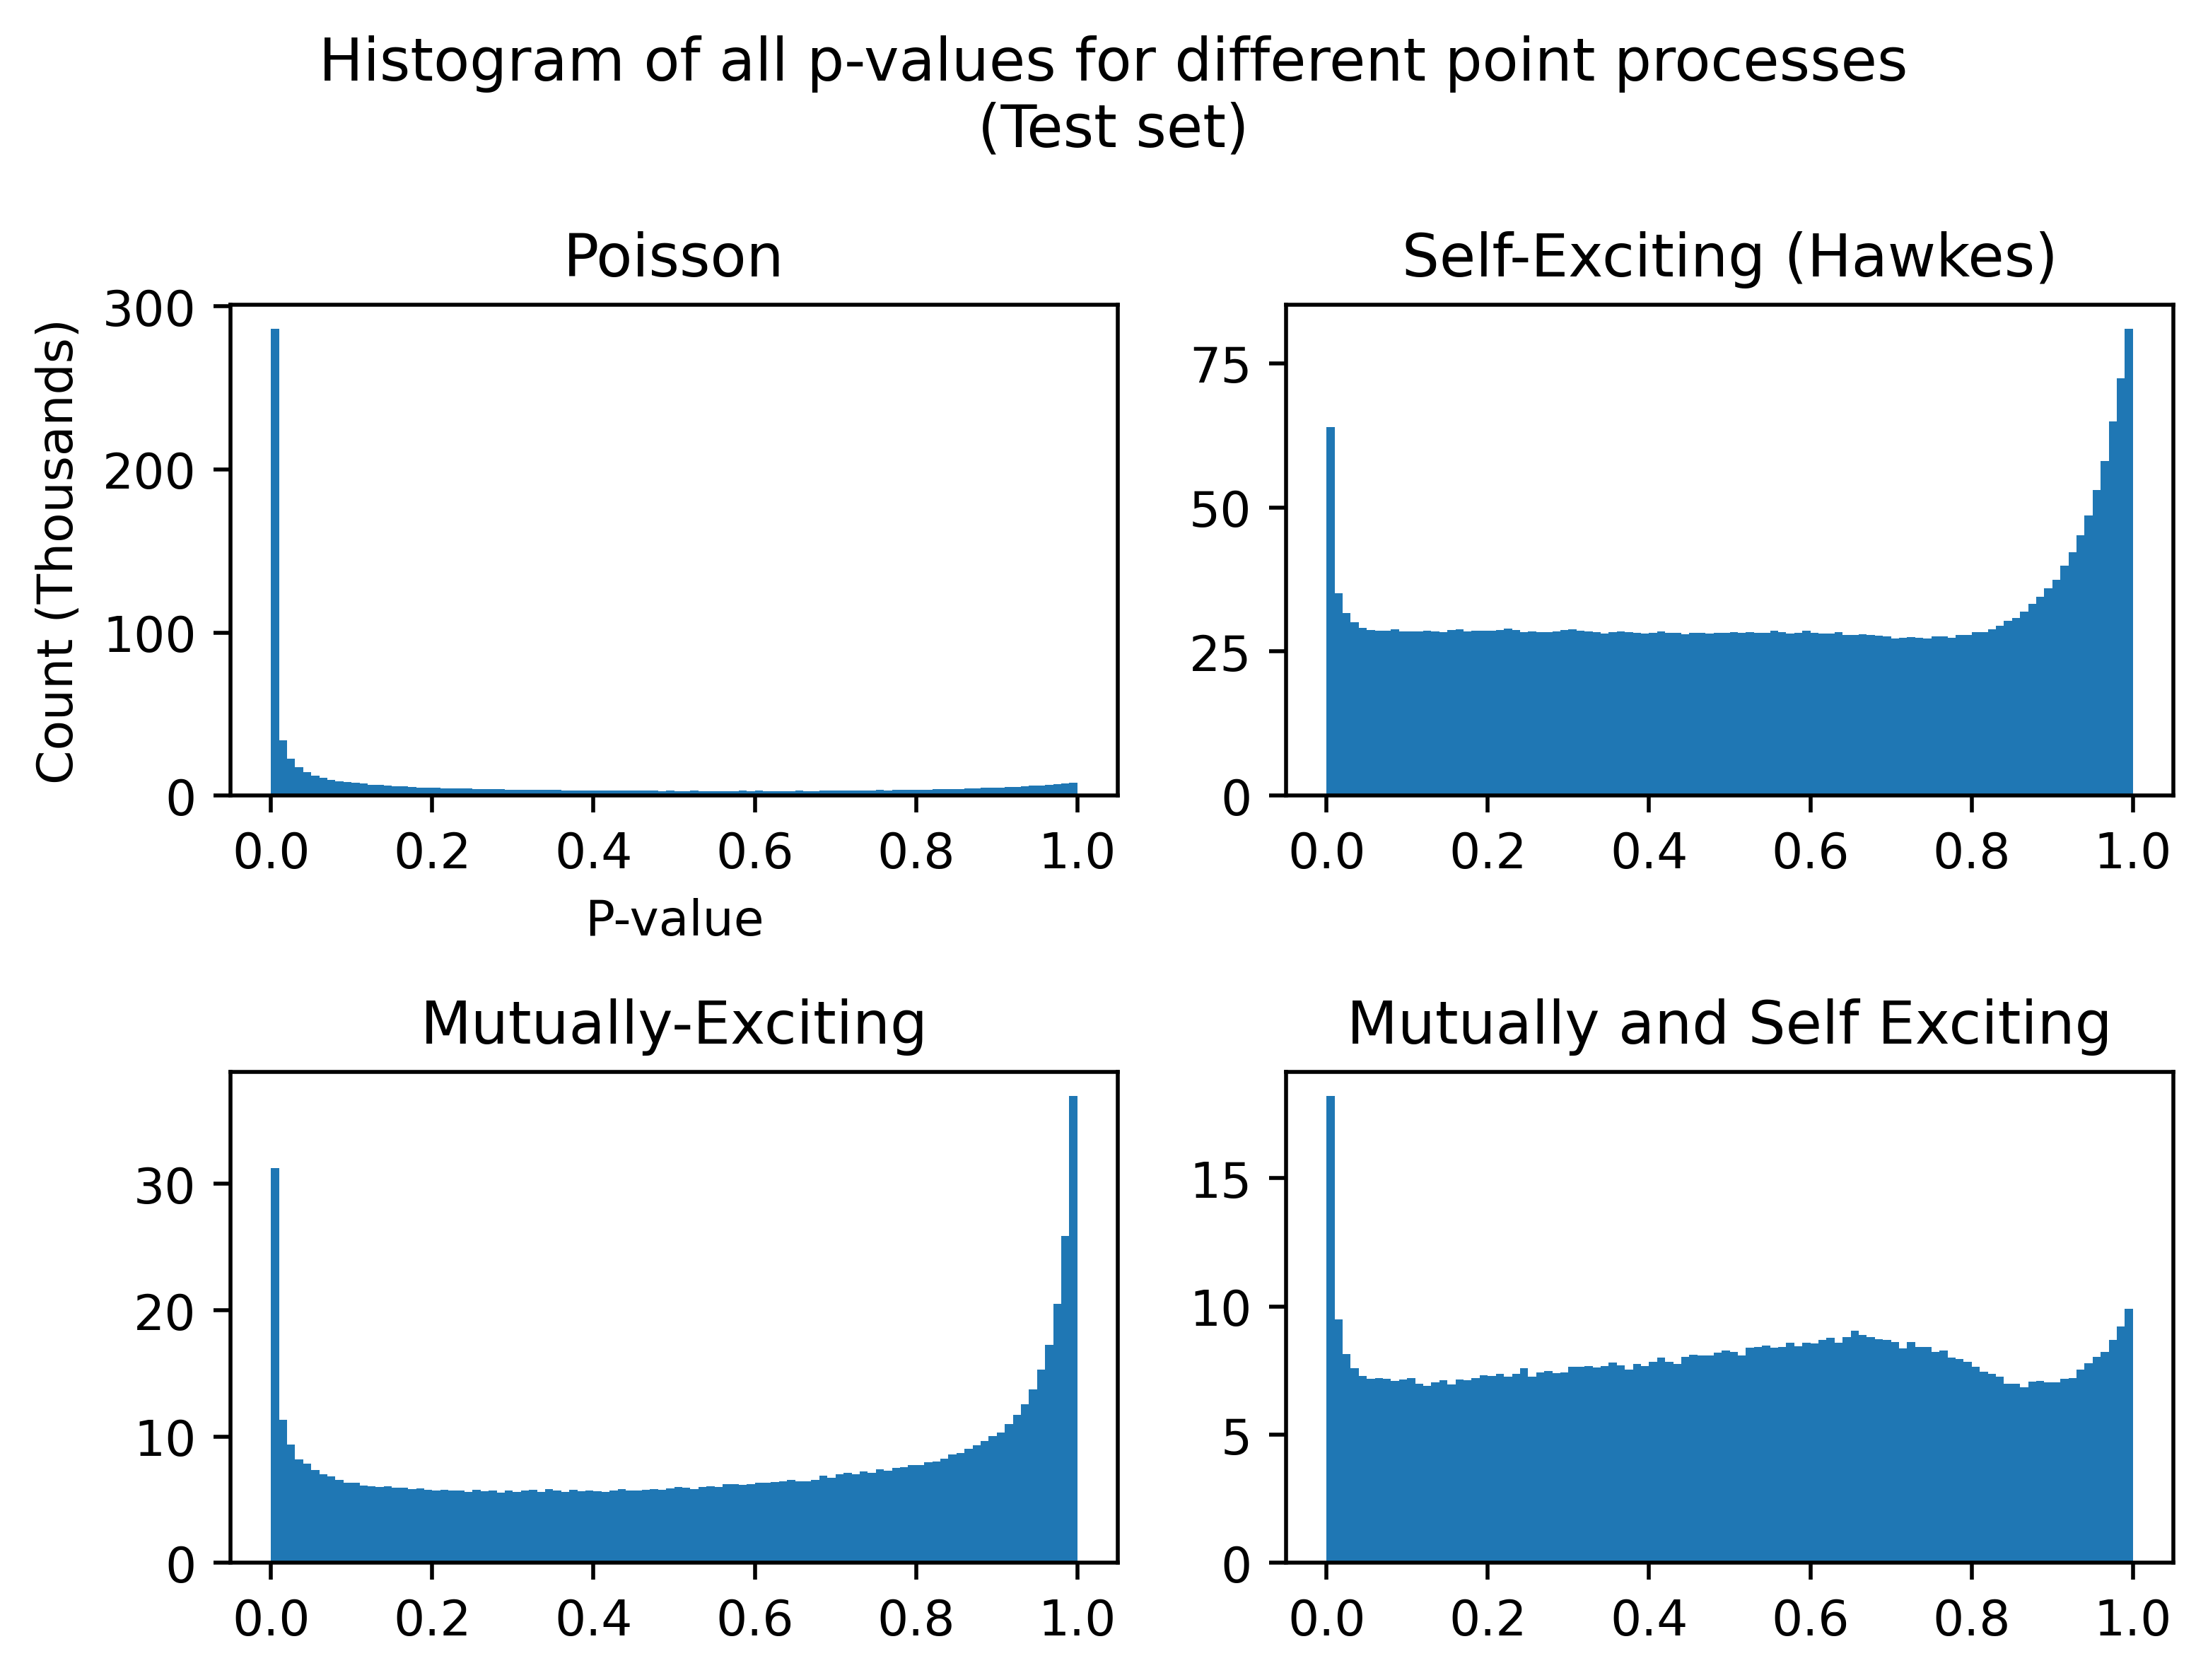

In [124]:
plt.rcParams['figure.dpi'] = 500
fig, axs = plt.subplots(2, 2)
fig.suptitle('Histogram of all p-values for different point processes\n(Test set)')
plot_M1_joined_p_value_hist()
plot_M2_joined_p_value_hist()
plot_M3_joined_p_value_hist()
plot_M4_joined_p_value_hist()
plt.tight_layout()
plt.show()

### Popularity Scatter plots

In [125]:
M1_pop_array_test = np.asarray(list(M1_popularity_dict_test.values()))
M2_pop_array_test = np.asarray(list(M2_popularity_dict_test.values()))
M3_pop_array_test = np.asarray(list(M3_popularity_dict_test.values()))
M4_pop_array_test = np.asarray(list(M4_popularity_dict_test.values()))

In [126]:
m1_test, b1_test = np.polyfit(M1_pop_array_test, M1_ks_array_test, 1)
m2_test, b2_test = np.polyfit(M2_pop_array_test, M2_ks_array_test, 1)
m3_test, b3_test = np.polyfit(M3_pop_array_test, M3_ks_array_test, 1)
m4_test, b4_test = np.polyfit(M4_pop_array_test, M4_ks_array_test, 1)

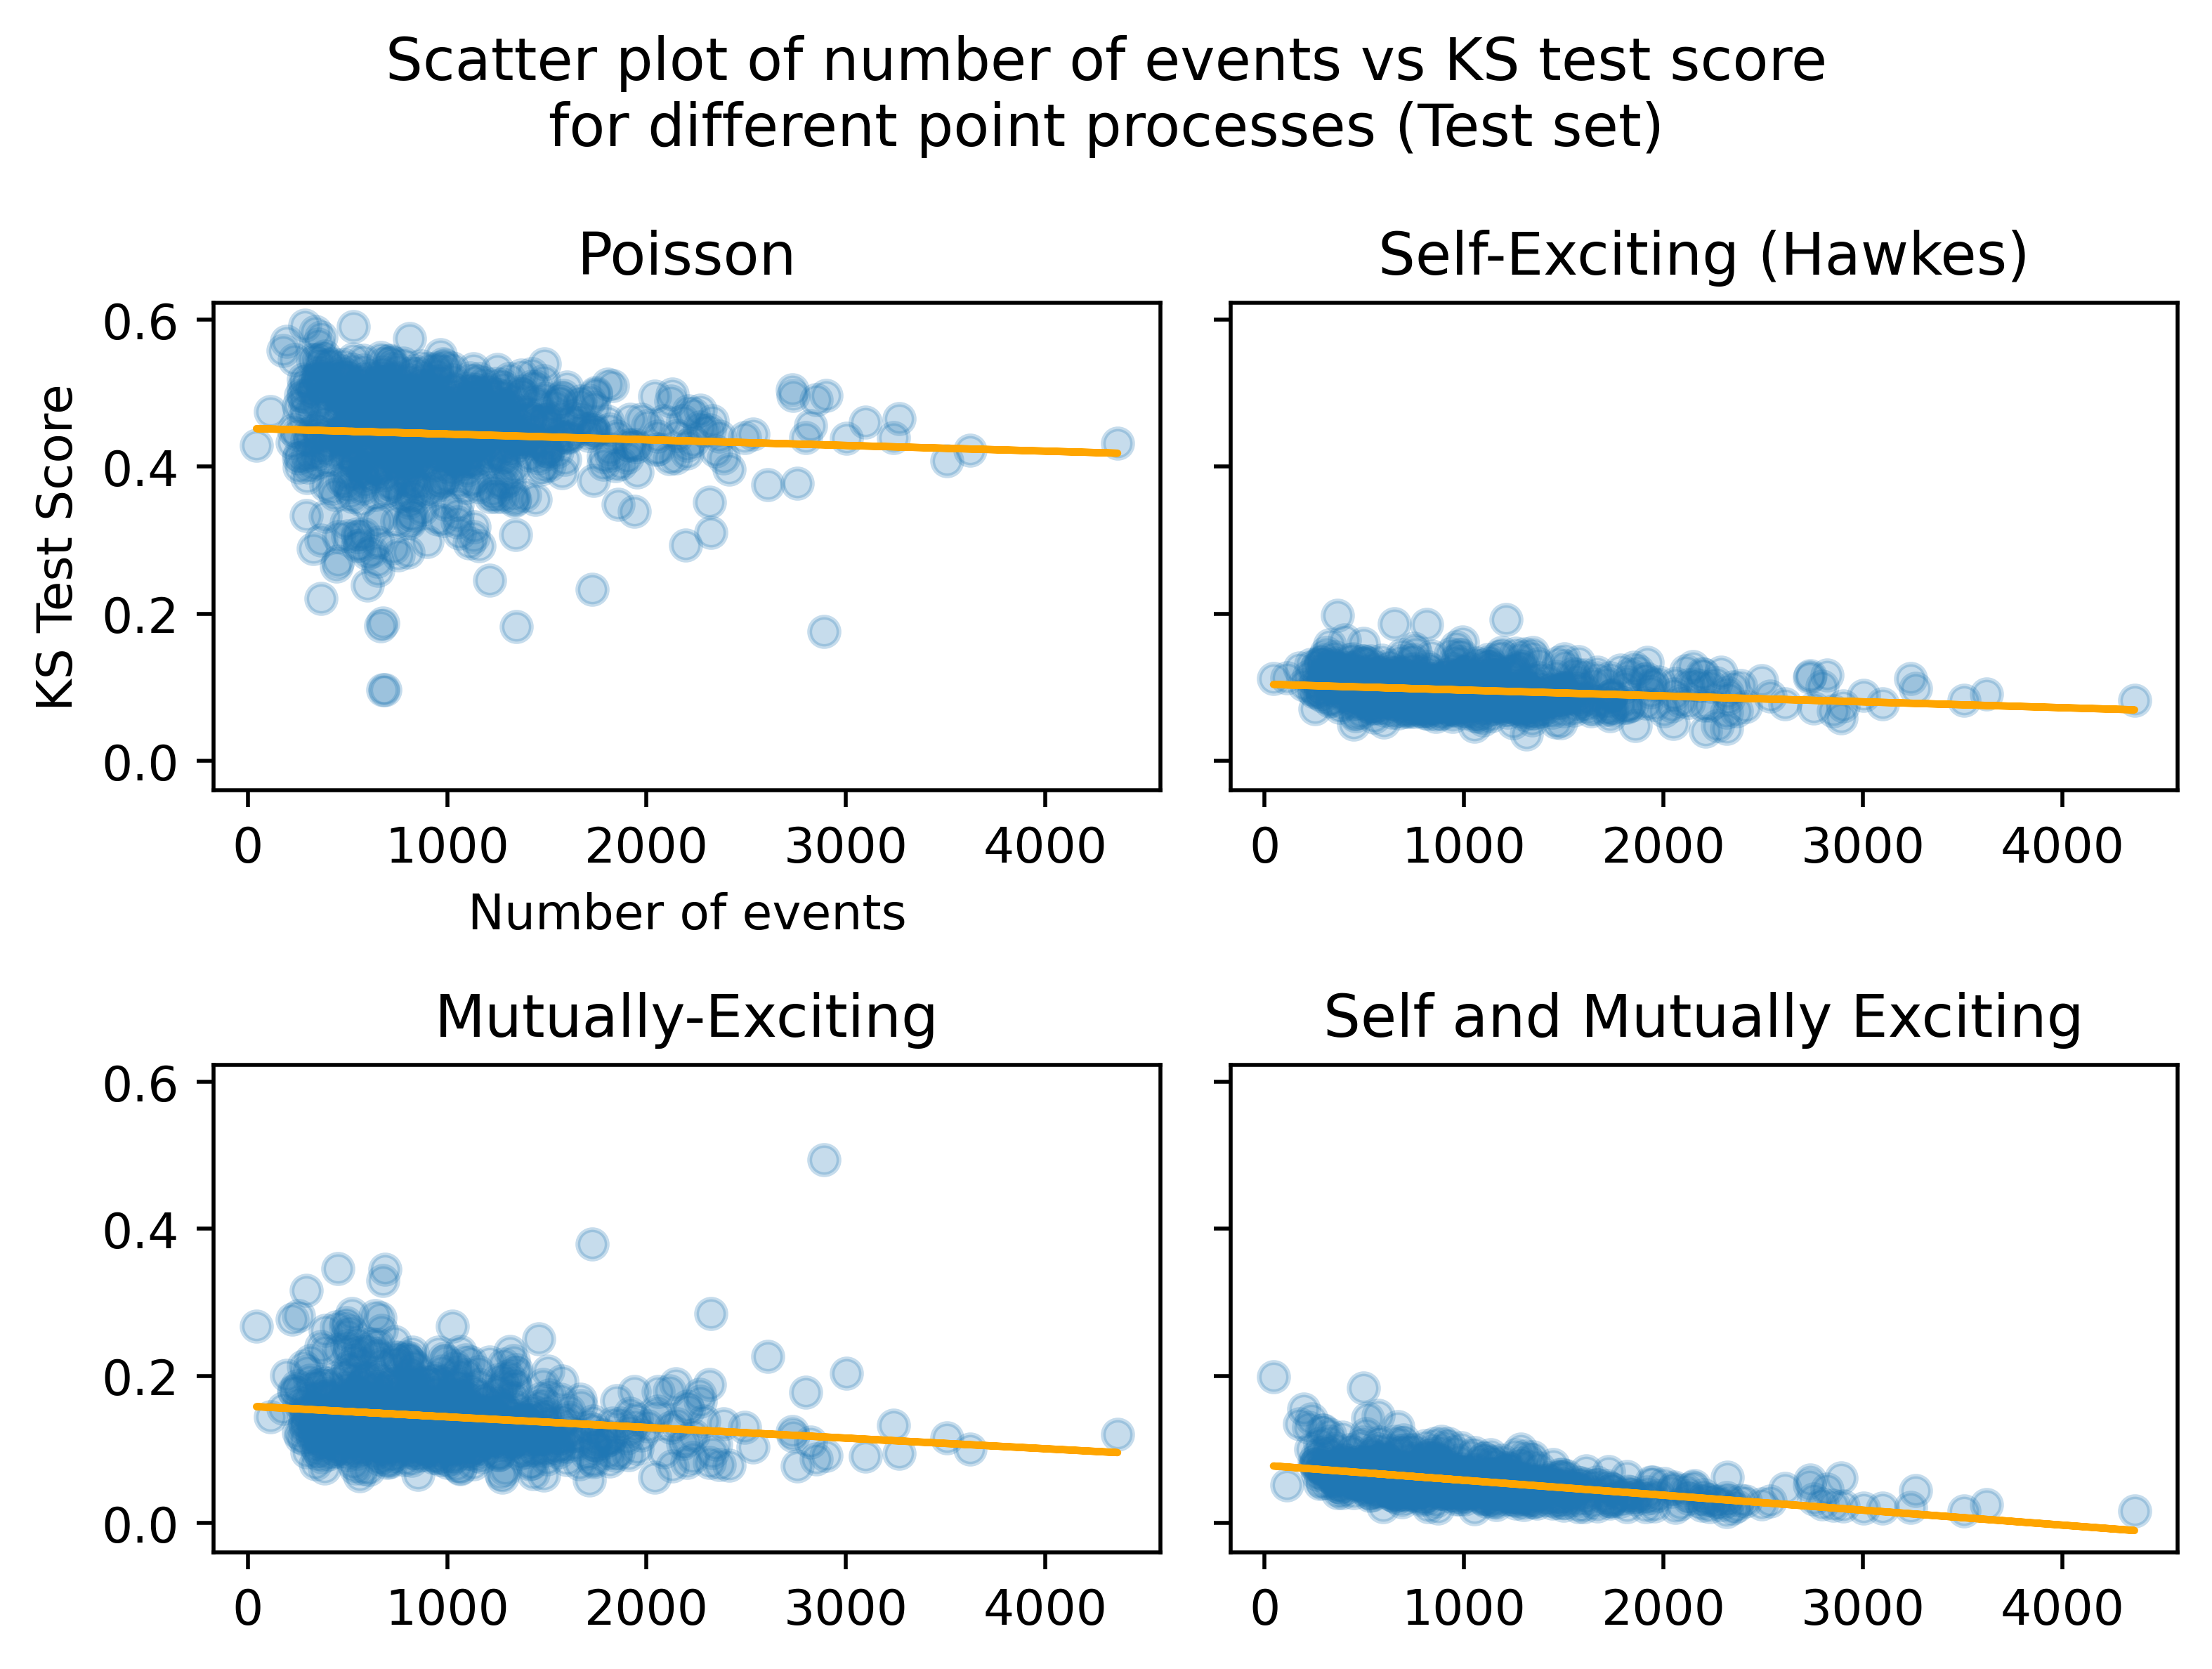

In [127]:
plt.rcParams['figure.dpi'] = 500
fig, axs = plt.subplots(2, 2, sharey=True)
fig.suptitle('Scatter plot of number of events vs KS test score\nfor different point processes (Test set)')

axs[0, 0].set_title("Poisson")
axs[0, 0].set_ylabel("KS Test Score")
axs[0, 0].set_xlabel("Number of events")
axs[0, 0].scatter(M1_pop_array_test, M1_ks_array_test, alpha=0.25)
axs[0, 0].plot(M1_pop_array_test, m1_test*M1_pop_array_test + b1_test, color="orange")

axs[0, 1].set_title("Self-Exciting (Hawkes)")
axs[0, 1].scatter(M2_pop_array_test, M2_ks_array_test, alpha=0.25)
axs[0, 1].plot(M2_pop_array_test, m2_test*M2_pop_array_test + b2_test, color="orange")

axs[1, 0].set_title("Mutually-Exciting")
axs[1, 0].scatter(M3_pop_array_test, M3_ks_array_test, alpha=0.25)
axs[1, 0].plot(M3_pop_array_test, m3_test*M3_pop_array_test + b3_test, color="orange")

axs[1, 1].set_title("Self and Mutually Exciting")
axs[1, 1].scatter(M4_pop_array_test, M4_ks_array_test, alpha=0.25)
axs[1, 1].plot(M4_pop_array_test, m4_test*M4_pop_array_test + b4_test, color="orange")

plt.tight_layout()
plt.show()